(0.0, 8.0)

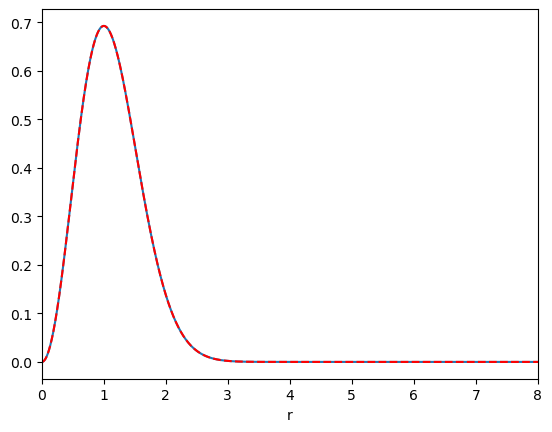

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 500                                           # Truncation ordem

L0 = 3                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      


colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Rational Tchebyshev Polinomials SB_2n): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
        

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.941140163782         # 0.94114016378 -> Disperse;  #    0.941140163785    -> AH      (Scalar field amplitude)

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


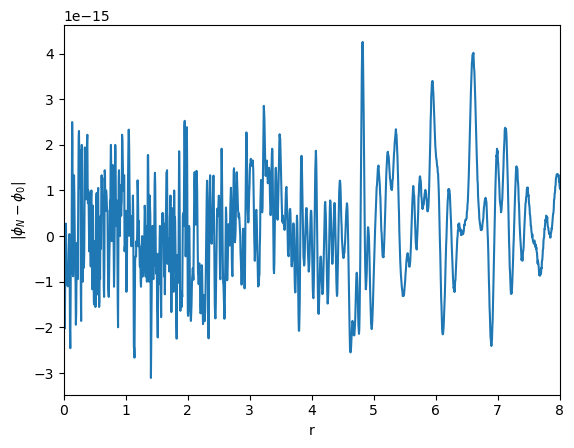

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


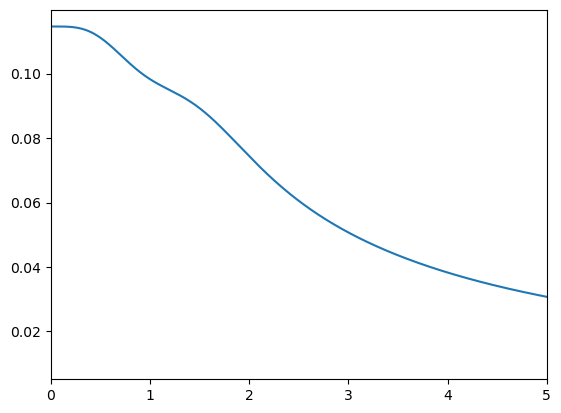

In [4]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [5]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# Grid 1: 

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(SB_2[1:(N+2),:] + SB_2[0:(N+1),:])          # VERIFICADO
rSB1_2 = 1/2*(rSB_2[1:(N+2),:] + rSB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrSB_2[1:(N+2),:] + rrSB_2[0:(N+1),:])




# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [6]:
np.shape(SB1)

(501, 501)

In [7]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [8]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

filter1 = np.ones(N+1)
filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [9]:
# Runge Kutta 4th order
import time

init = time.time()

h = 0.0002   # step size
tf = 8

It = int(tf/h)

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

#out_a = open('Alpha_origin.txt', 'a')
#out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi)   
  rPi= np.dot(b0, rpsi)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, psi_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  #out_a.write(str(Alpha_0))
  #out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1, psi)      
  rPhi = np.dot(a0 + L1, rpsi)
  rrPhi = np.dot(a0 + L1, rrpsi)

  Pi = np.dot(b0 + N1, psi)   
  rPi= np.dot(b0 + N1, rpsi)
    
  Chi = np.dot(c0 + K1, psi) 
  rChi = np.dot(c0 + K1, rpsi)
  rrChi = np.dot(c0 + K1, rrpsi) 

  Phi_2 = np.dot(a0 + L1, psi_2)
  rPhi_2 = np.dot(a0 + L1, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1, psi_2)  
    
  Chi_2 = np.dot(c0 + K1, psi_2)
  rChi_2 = np.dot(c0 + K1, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)

    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
    
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
    
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, psi_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)

 
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step  
  Phi = np.dot(filter1*a0 + L3, psi)     
  rPhi= np.dot(filter1*a0 + L3 , rpsi)
  rrPhi = np.dot(filter1*a0 + L3, rrpsi)
    
  Pi = np.dot(filter1*b0 + N3, psi)
  rPi= np.dot(filter1*b0 + N3, rpsi)
    
  Chi = np.dot(filter1*c0 + K3, psi)
  rChi = np.dot(filter1*c0 + K3, rpsi)
  rrChi = np.dot(filter1*c0 + K3, rrpsi)

  Phi_2 = np.dot(filter1*a0 + L3, psi_2)
  rPhi_2 = np.dot(filter1*a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, psi_2)  
    
  Chi_2 = np.dot(filter1*c0 + K3, psi_2)
  rChi_2 = np.dot(filter1*c0 + K3, rpsi_2)


  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  
  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()   
    
fim = time.time()    

tex = (fim - init)/60

t1 = np.linspace(0, tf, len(Alpha_origin)) 

0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.08300000000000032
0.08320000000000033
0.08340000000000033
0.08360000000000034
0.08380000000000035
0.08400000000000035
0.08420000000000036
0.08440000000000036
0.08460000000000037
0.08480000000000038
0.08500000000000038
0.08520000000000039
0.08540000000000039
0.0856000000000004
0.0858000000000004
0.08600000000000041
0.08620000000000042
0.08640000000000042
0.08660000000000043
0.08680000000000043
0.08700000000000044
0.08720000000000044
0.08740000000000045
0.08760000000000046
0.08780000000000046
0.08800000000000047
0.08820000000000047
0.08840000000000048
0.08860000000000048
0.08880000000000049
0.0890000000000005
0.0892000000000005
0.0894000000000005
0.08960000000000051
0.08980000000000052
0.09000000000000052
0.09020000000000053
0.09040000000000054
0.09060000000000054
0.09080000000000055
0.09100000000000055
0.09120000000000056
0.09140000000000056
0.09160000000000057
0.09180000000000058
0.09200000000000058
0.09220000000000059
0.09240000000000059
0.0926000000000006
0.0928000000000006
0.09300

0.1660000000000027
0.1662000000000027
0.1664000000000027
0.16660000000000272
0.16680000000000272
0.16700000000000273
0.16720000000000274
0.16740000000000274
0.16760000000000275
0.16780000000000275
0.16800000000000276
0.16820000000000276
0.16840000000000277
0.16860000000000278
0.16880000000000278
0.1690000000000028
0.1692000000000028
0.1694000000000028
0.1696000000000028
0.1698000000000028
0.17000000000000282
0.17020000000000282
0.17040000000000283
0.17060000000000283
0.17080000000000284
0.17100000000000284
0.17120000000000285
0.17140000000000286
0.17160000000000286
0.17180000000000287
0.17200000000000287
0.17220000000000288
0.17240000000000288
0.1726000000000029
0.1728000000000029
0.1730000000000029
0.1732000000000029
0.1734000000000029
0.17360000000000292
0.17380000000000292
0.17400000000000293
0.17420000000000294
0.17440000000000294
0.17460000000000295
0.17480000000000295
0.17500000000000296
0.17520000000000296
0.17540000000000297
0.17560000000000298
0.17580000000000298
0.17600000000

0.2494000000000051
0.2496000000000051
0.2498000000000051
0.2500000000000051
0.2502000000000051
0.25040000000000506
0.25060000000000504
0.250800000000005
0.251000000000005
0.251200000000005
0.25140000000000495
0.25160000000000493
0.2518000000000049
0.2520000000000049
0.25220000000000486
0.25240000000000484
0.2526000000000048
0.2528000000000048
0.2530000000000048
0.25320000000000475
0.25340000000000473
0.2536000000000047
0.2538000000000047
0.25400000000000467
0.25420000000000464
0.2544000000000046
0.2546000000000046
0.2548000000000046
0.25500000000000456
0.25520000000000453
0.2554000000000045
0.2556000000000045
0.25580000000000447
0.25600000000000445
0.2562000000000044
0.2564000000000044
0.2566000000000044
0.25680000000000436
0.25700000000000434
0.2572000000000043
0.2574000000000043
0.25760000000000427
0.25780000000000425
0.2580000000000042
0.2582000000000042
0.2584000000000042
0.25860000000000416
0.25880000000000414
0.2590000000000041
0.2592000000000041
0.25940000000000407
0.25960000000

0.3343999999999958
0.3345999999999958
0.33479999999999577
0.33499999999999575
0.3351999999999957
0.3353999999999957
0.3355999999999957
0.33579999999999566
0.33599999999999564
0.3361999999999956
0.3363999999999956
0.33659999999999557
0.33679999999999555
0.3369999999999955
0.3371999999999955
0.3373999999999955
0.33759999999999546
0.33779999999999544
0.3379999999999954
0.3381999999999954
0.33839999999999537
0.33859999999999535
0.3387999999999953
0.3389999999999953
0.3391999999999953
0.33939999999999526
0.33959999999999524
0.3397999999999952
0.3399999999999952
0.3401999999999952
0.34039999999999515
0.34059999999999513
0.3407999999999951
0.3409999999999951
0.34119999999999506
0.34139999999999504
0.341599999999995
0.341799999999995
0.341999999999995
0.34219999999999495
0.34239999999999493
0.3425999999999949
0.3427999999999949
0.34299999999999486
0.34319999999999484
0.3433999999999948
0.3435999999999948
0.3437999999999948
0.34399999999999475
0.34419999999999473
0.3443999999999947
0.3445999999

0.4189999999999865
0.4191999999999865
0.41939999999998645
0.41959999999998643
0.4197999999999864
0.4199999999999864
0.42019999999998636
0.42039999999998634
0.4205999999999863
0.4207999999999863
0.4209999999999863
0.42119999999998625
0.42139999999998623
0.4215999999999862
0.4217999999999862
0.42199999999998616
0.42219999999998614
0.4223999999999861
0.4225999999999861
0.4227999999999861
0.42299999999998605
0.42319999999998603
0.423399999999986
0.423599999999986
0.42379999999998597
0.42399999999998594
0.4241999999999859
0.4243999999999859
0.4245999999999859
0.42479999999998586
0.42499999999998583
0.4251999999999858
0.4253999999999858
0.42559999999998577
0.42579999999998575
0.4259999999999857
0.4261999999999857
0.4263999999999857
0.42659999999998566
0.42679999999998564
0.4269999999999856
0.4271999999999856
0.42739999999998557
0.42759999999998555
0.4277999999999855
0.4279999999999855
0.4281999999999855
0.42839999999998546
0.42859999999998544
0.4287999999999854
0.4289999999999854
0.429199999

0.5037999999999772
0.5039999999999771
0.5041999999999771
0.5043999999999771
0.5045999999999771
0.504799999999977
0.504999999999977
0.505199999999977
0.505399999999977
0.505599999999977
0.5057999999999769
0.5059999999999769
0.5061999999999769
0.5063999999999769
0.5065999999999768
0.5067999999999768
0.5069999999999768
0.5071999999999768
0.5073999999999768
0.5075999999999767
0.5077999999999767
0.5079999999999767
0.5081999999999767
0.5083999999999766
0.5085999999999766
0.5087999999999766
0.5089999999999766
0.5091999999999766
0.5093999999999765
0.5095999999999765
0.5097999999999765
0.5099999999999765
0.5101999999999765
0.5103999999999764
0.5105999999999764
0.5107999999999764
0.5109999999999764
0.5111999999999763
0.5113999999999763
0.5115999999999763
0.5117999999999763
0.5119999999999763
0.5121999999999762
0.5123999999999762
0.5125999999999762
0.5127999999999762
0.5129999999999761
0.5131999999999761
0.5133999999999761
0.5135999999999761
0.513799999999976
0.513999999999976
0.514199999999976
0

0.5909999999999676
0.5911999999999675
0.5913999999999675
0.5915999999999675
0.5917999999999675
0.5919999999999674
0.5921999999999674
0.5923999999999674
0.5925999999999674
0.5927999999999674
0.5929999999999673
0.5931999999999673
0.5933999999999673
0.5935999999999673
0.5937999999999672
0.5939999999999672
0.5941999999999672
0.5943999999999672
0.5945999999999672
0.5947999999999671
0.5949999999999671
0.5951999999999671
0.5953999999999671
0.595599999999967
0.595799999999967
0.595999999999967
0.596199999999967
0.596399999999967
0.5965999999999669
0.5967999999999669
0.5969999999999669
0.5971999999999669
0.5973999999999668
0.5975999999999668
0.5977999999999668
0.5979999999999668
0.5981999999999668
0.5983999999999667
0.5985999999999667
0.5987999999999667
0.5989999999999667
0.5991999999999666
0.5993999999999666
0.5995999999999666
0.5997999999999666
0.5999999999999666
0.6001999999999665
0.6003999999999665
0.6005999999999665
0.6007999999999665
0.6009999999999664
0.6011999999999664
0.601399999999966

0.677799999999958
0.677999999999958
0.678199999999958
0.6783999999999579
0.6785999999999579
0.6787999999999579
0.6789999999999579
0.6791999999999578
0.6793999999999578
0.6795999999999578
0.6797999999999578
0.6799999999999577
0.6801999999999577
0.6803999999999577
0.6805999999999577
0.6807999999999577
0.6809999999999576
0.6811999999999576
0.6813999999999576
0.6815999999999576
0.6817999999999576
0.6819999999999575
0.6821999999999575
0.6823999999999575
0.6825999999999575
0.6827999999999574
0.6829999999999574
0.6831999999999574
0.6833999999999574
0.6835999999999574
0.6837999999999573
0.6839999999999573
0.6841999999999573
0.6843999999999573
0.6845999999999572
0.6847999999999572
0.6849999999999572
0.6851999999999572
0.6853999999999572
0.6855999999999571
0.6857999999999571
0.6859999999999571
0.6861999999999571
0.686399999999957
0.686599999999957
0.686799999999957
0.686999999999957
0.687199999999957
0.6873999999999569
0.6875999999999569
0.6877999999999569
0.6879999999999569
0.6881999999999568
0

0.7647999999999484
0.7649999999999484
0.7651999999999484
0.7653999999999483
0.7655999999999483
0.7657999999999483
0.7659999999999483
0.7661999999999483
0.7663999999999482
0.7665999999999482
0.7667999999999482
0.7669999999999482
0.7671999999999481
0.7673999999999481
0.7675999999999481
0.7677999999999481
0.7679999999999481
0.768199999999948
0.768399999999948
0.768599999999948
0.768799999999948
0.768999999999948
0.7691999999999479
0.7693999999999479
0.7695999999999479
0.7697999999999479
0.7699999999999478
0.7701999999999478
0.7703999999999478
0.7705999999999478
0.7707999999999477
0.7709999999999477
0.7711999999999477
0.7713999999999477
0.7715999999999477
0.7717999999999476
0.7719999999999476
0.7721999999999476
0.7723999999999476
0.7725999999999476
0.7727999999999475
0.7729999999999475
0.7731999999999475
0.7733999999999475
0.7735999999999474
0.7737999999999474
0.7739999999999474
0.7741999999999474
0.7743999999999474
0.7745999999999473
0.7747999999999473
0.7749999999999473
0.775199999999947

0.8517999999999388
0.8519999999999388
0.8521999999999388
0.8523999999999388
0.8525999999999387
0.8527999999999387
0.8529999999999387
0.8531999999999387
0.8533999999999387
0.8535999999999386
0.8537999999999386
0.8539999999999386
0.8541999999999386
0.8543999999999385
0.8545999999999385
0.8547999999999385
0.8549999999999385
0.8551999999999385
0.8553999999999384
0.8555999999999384
0.8557999999999384
0.8559999999999384
0.8561999999999383
0.8563999999999383
0.8565999999999383
0.8567999999999383
0.8569999999999383
0.8571999999999382
0.8573999999999382
0.8575999999999382
0.8577999999999382
0.8579999999999381
0.8581999999999381
0.8583999999999381
0.8585999999999381
0.8587999999999381
0.858999999999938
0.859199999999938
0.859399999999938
0.859599999999938
0.859799999999938
0.8599999999999379
0.8601999999999379
0.8603999999999379
0.8605999999999379
0.8607999999999378
0.8609999999999378
0.8611999999999378
0.8613999999999378
0.8615999999999377
0.8617999999999377
0.8619999999999377
0.862199999999937

0.9385999999999293
0.9387999999999292
0.9389999999999292
0.9391999999999292
0.9393999999999292
0.9395999999999292
0.9397999999999291
0.9399999999999291
0.9401999999999291
0.9403999999999291
0.940599999999929
0.940799999999929
0.940999999999929
0.941199999999929
0.941399999999929
0.9415999999999289
0.9417999999999289
0.9419999999999289
0.9421999999999289
0.9423999999999289
0.9425999999999288
0.9427999999999288
0.9429999999999288
0.9431999999999288
0.9433999999999287
0.9435999999999287
0.9437999999999287
0.9439999999999287
0.9441999999999287
0.9443999999999286
0.9445999999999286
0.9447999999999286
0.9449999999999286
0.9451999999999285
0.9453999999999285
0.9455999999999285
0.9457999999999285
0.9459999999999285
0.9461999999999284
0.9463999999999284
0.9465999999999284
0.9467999999999284
0.9469999999999283
0.9471999999999283
0.9473999999999283
0.9475999999999283
0.9477999999999283
0.9479999999999282
0.9481999999999282
0.9483999999999282
0.9485999999999282
0.9487999999999281
0.948999999999928

1.0257999999999197
1.0259999999999196
1.0261999999999196
1.0263999999999196
1.0265999999999196
1.0267999999999196
1.0269999999999195
1.0271999999999195
1.0273999999999195
1.0275999999999195
1.0277999999999194
1.0279999999999194
1.0281999999999194
1.0283999999999194
1.0285999999999194
1.0287999999999193
1.0289999999999193
1.0291999999999193
1.0293999999999193
1.0295999999999192
1.0297999999999192
1.0299999999999192
1.0301999999999192
1.0303999999999192
1.0305999999999191
1.0307999999999191
1.030999999999919
1.031199999999919
1.031399999999919
1.031599999999919
1.031799999999919
1.031999999999919
1.032199999999919
1.032399999999919
1.032599999999919
1.032799999999919
1.0329999999999189
1.0331999999999188
1.0333999999999188
1.0335999999999188
1.0337999999999188
1.0339999999999188
1.0341999999999187
1.0343999999999187
1.0345999999999187
1.0347999999999187
1.0349999999999187
1.0351999999999186
1.0353999999999186
1.0355999999999186
1.0357999999999186
1.0359999999999185
1.0361999999999185
1.0

1.11319999999991
1.11339999999991
1.11359999999991
1.11379999999991
1.11399999999991
1.11419999999991
1.11439999999991
1.1145999999999099
1.1147999999999099
1.1149999999999098
1.1151999999999098
1.1153999999999098
1.1155999999999098
1.1157999999999098
1.1159999999999097
1.1161999999999097
1.1163999999999097
1.1165999999999097
1.1167999999999096
1.1169999999999096
1.1171999999999096
1.1173999999999096
1.1175999999999096
1.1177999999999095
1.1179999999999095
1.1181999999999095
1.1183999999999095
1.1185999999999094
1.1187999999999094
1.1189999999999094
1.1191999999999094
1.1193999999999094
1.1195999999999093
1.1197999999999093
1.1199999999999093
1.1201999999999093
1.1203999999999092
1.1205999999999092
1.1207999999999092
1.1209999999999092
1.1211999999999092
1.1213999999999091
1.1215999999999091
1.121799999999909
1.121999999999909
1.122199999999909
1.122399999999909
1.122599999999909
1.122799999999909
1.122999999999909
1.123199999999909
1.123399999999909
1.123599999999909
1.123799999999908

1.2005999999999004
1.2007999999999004
1.2009999999999004
1.2011999999999003
1.2013999999999003
1.2015999999999003
1.2017999999999003
1.2019999999999003
1.2021999999999002
1.2023999999999002
1.2025999999999002
1.2027999999999002
1.2029999999999001
1.2031999999999001
1.2033999999999
1.2035999999999
1.2037999999999
1.2039999999999
1.2041999999999
1.2043999999999
1.2045999999999
1.2047999999999
1.2049999999999
1.2051999999999
1.2053999999998999
1.2055999999998999
1.2057999999998998
1.2059999999998998
1.2061999999998998
1.2063999999998998
1.2065999999998998
1.2067999999998997
1.2069999999998997
1.2071999999998997
1.2073999999998997
1.2075999999998996
1.2077999999998996
1.2079999999998996
1.2081999999998996
1.2083999999998996
1.2085999999998995
1.2087999999998995
1.2089999999998995
1.2091999999998995
1.2093999999998994
1.2095999999998994
1.2097999999998994
1.2099999999998994
1.2101999999998994
1.2103999999998993
1.2105999999998993
1.2107999999998993
1.2109999999998993
1.2111999999998992
1.21

1.2881999999998908
1.2883999999998907
1.2885999999998907
1.2887999999998907
1.2889999999998907
1.2891999999998907
1.2893999999998906
1.2895999999998906
1.2897999999998906
1.2899999999998906
1.2901999999998905
1.2903999999998905
1.2905999999998905
1.2907999999998905
1.2909999999998905
1.2911999999998904
1.2913999999998904
1.2915999999998904
1.2917999999998904
1.2919999999998903
1.2921999999998903
1.2923999999998903
1.2925999999998903
1.2927999999998903
1.2929999999998902
1.2931999999998902
1.2933999999998902
1.2935999999998902
1.2937999999998901
1.2939999999998901
1.29419999999989
1.29439999999989
1.29459999999989
1.29479999999989
1.29499999999989
1.29519999999989
1.29539999999989
1.29559999999989
1.29579999999989
1.29599999999989
1.2961999999998899
1.2963999999998899
1.2965999999998898
1.2967999999998898
1.2969999999998898
1.2971999999998898
1.2973999999998898
1.2975999999998897
1.2977999999998897
1.2979999999998897
1.2981999999998897
1.2983999999998896
1.2985999999998896
1.29879999999

1.3755999999998811
1.3757999999998811
1.375999999999881
1.376199999999881
1.376399999999881
1.376599999999881
1.376799999999881
1.376999999999881
1.377199999999881
1.377399999999881
1.377599999999881
1.377799999999881
1.3779999999998809
1.3781999999998809
1.3783999999998808
1.3785999999998808
1.3787999999998808
1.3789999999998808
1.3791999999998807
1.3793999999998807
1.3795999999998807
1.3797999999998807
1.3799999999998807
1.3801999999998806
1.3803999999998806
1.3805999999998806
1.3807999999998806
1.3809999999998805
1.3811999999998805
1.3813999999998805
1.3815999999998805
1.3817999999998805
1.3819999999998804
1.3821999999998804
1.3823999999998804
1.3825999999998804
1.3827999999998803
1.3829999999998803
1.3831999999998803
1.3833999999998803
1.3835999999998803
1.3837999999998802
1.3839999999998802
1.3841999999998802
1.3843999999998802
1.3845999999998801
1.3847999999998801
1.38499999999988
1.38519999999988
1.38539999999988
1.38559999999988
1.38579999999988
1.38599999999988
1.3861999999998

1.4629999999998715
1.4631999999998715
1.4633999999998715
1.4635999999998714
1.4637999999998714
1.4639999999998714
1.4641999999998714
1.4643999999998714
1.4645999999998713
1.4647999999998713
1.4649999999998713
1.4651999999998713
1.4653999999998713
1.4655999999998712
1.4657999999998712
1.4659999999998712
1.4661999999998712
1.4663999999998711
1.4665999999998711
1.466799999999871
1.466999999999871
1.467199999999871
1.467399999999871
1.467599999999871
1.467799999999871
1.467999999999871
1.468199999999871
1.468399999999871
1.468599999999871
1.4687999999998709
1.4689999999998709
1.4691999999998708
1.4693999999998708
1.4695999999998708
1.4697999999998708
1.4699999999998707
1.4701999999998707
1.4703999999998707
1.4705999999998707
1.4707999999998707
1.4709999999998706
1.4711999999998706
1.4713999999998706
1.4715999999998706
1.4717999999998705
1.4719999999998705
1.4721999999998705
1.4723999999998705
1.4725999999998705
1.4727999999998704
1.4729999999998704
1.4731999999998704
1.4733999999998704
1.4

1.5503999999998619
1.5505999999998619
1.5507999999998618
1.5509999999998618
1.5511999999998618
1.5513999999998618
1.5515999999998618
1.5517999999998617
1.5519999999998617
1.5521999999998617
1.5523999999998617
1.5525999999998616
1.5527999999998616
1.5529999999998616
1.5531999999998616
1.5533999999998616
1.5535999999998615
1.5537999999998615
1.5539999999998615
1.5541999999998615
1.5543999999998614
1.5545999999998614
1.5547999999998614
1.5549999999998614
1.5551999999998614
1.5553999999998613
1.5555999999998613
1.5557999999998613
1.5559999999998613
1.5561999999998612
1.5563999999998612
1.5565999999998612
1.5567999999998612
1.5569999999998612
1.5571999999998611
1.5573999999998611
1.557599999999861
1.557799999999861
1.557999999999861
1.558199999999861
1.558399999999861
1.558599999999861
1.558799999999861
1.558999999999861
1.559199999999861
1.559399999999861
1.5595999999998609
1.5597999999998609
1.5599999999998608
1.5601999999998608
1.5603999999998608
1.5605999999998608
1.5607999999998607
1.5

1.6379999999998522
1.6381999999998522
1.6383999999998522
1.6385999999998522
1.6387999999998522
1.6389999999998521
1.639199999999852
1.639399999999852
1.639599999999852
1.639799999999852
1.639999999999852
1.640199999999852
1.640399999999852
1.640599999999852
1.640799999999852
1.640999999999852
1.6411999999998519
1.6413999999998519
1.6415999999998518
1.6417999999998518
1.6419999999998518
1.6421999999998518
1.6423999999998518
1.6425999999998517
1.6427999999998517
1.6429999999998517
1.6431999999998517
1.6433999999998516
1.6435999999998516
1.6437999999998516
1.6439999999998516
1.6441999999998516
1.6443999999998515
1.6445999999998515
1.6447999999998515
1.6449999999998515
1.6451999999998514
1.6453999999998514
1.6455999999998514
1.6457999999998514
1.6459999999998514
1.6461999999998513
1.6463999999998513
1.6465999999998513
1.6467999999998513
1.6469999999998512
1.6471999999998512
1.6473999999998512
1.6475999999998512
1.6477999999998512
1.6479999999998511
1.6481999999998511
1.648399999999851
1.64

1.7255999999998426
1.7257999999998426
1.7259999999998425
1.7261999999998425
1.7263999999998425
1.7265999999998425
1.7267999999998425
1.7269999999998424
1.7271999999998424
1.7273999999998424
1.7275999999998424
1.7277999999998424
1.7279999999998423
1.7281999999998423
1.7283999999998423
1.7285999999998423
1.7287999999998422
1.7289999999998422
1.7291999999998422
1.7293999999998422
1.7295999999998422
1.7297999999998421
1.729999999999842
1.730199999999842
1.730399999999842
1.730599999999842
1.730799999999842
1.730999999999842
1.731199999999842
1.731399999999842
1.731599999999842
1.731799999999842
1.7319999999998419
1.7321999999998419
1.7323999999998418
1.7325999999998418
1.7327999999998418
1.7329999999998418
1.7331999999998418
1.7333999999998417
1.7335999999998417
1.7337999999998417
1.7339999999998417
1.7341999999998416
1.7343999999998416
1.7345999999998416
1.7347999999998416
1.7349999999998416
1.7351999999998415
1.7353999999998415
1.7355999999998415
1.7357999999998415
1.7359999999998414
1.7

1.813399999999833
1.813599999999833
1.8137999999998329
1.8139999999998329
1.8141999999998328
1.8143999999998328
1.8145999999998328
1.8147999999998328
1.8149999999998327
1.8151999999998327
1.8153999999998327
1.8155999999998327
1.8157999999998327
1.8159999999998326
1.8161999999998326
1.8163999999998326
1.8165999999998326
1.8167999999998325
1.8169999999998325
1.8171999999998325
1.8173999999998325
1.8175999999998325
1.8177999999998324
1.8179999999998324
1.8181999999998324
1.8183999999998324
1.8185999999998324
1.8187999999998323
1.8189999999998323
1.8191999999998323
1.8193999999998323
1.8195999999998322
1.8197999999998322
1.8199999999998322
1.8201999999998322
1.8203999999998322
1.8205999999998321
1.820799999999832
1.820999999999832
1.821199999999832
1.821399999999832
1.821599999999832
1.821799999999832
1.821999999999832
1.822199999999832
1.822399999999832
1.822599999999832
1.8227999999998319
1.8229999999998319
1.8231999999998318
1.8233999999998318
1.8235999999998318
1.8237999999998318
1.823

1.9011999999998233
1.9013999999998232
1.9015999999998232
1.9017999999998232
1.9019999999998232
1.9021999999998231
1.9023999999998231
1.902599999999823
1.902799999999823
1.902999999999823
1.903199999999823
1.903399999999823
1.903599999999823
1.903799999999823
1.903999999999823
1.904199999999823
1.904399999999823
1.9045999999998229
1.9047999999998229
1.9049999999998228
1.9051999999998228
1.9053999999998228
1.9055999999998228
1.9057999999998227
1.9059999999998227
1.9061999999998227
1.9063999999998227
1.9065999999998227
1.9067999999998226
1.9069999999998226
1.9071999999998226
1.9073999999998226
1.9075999999998225
1.9077999999998225
1.9079999999998225
1.9081999999998225
1.9083999999998225
1.9085999999998224
1.9087999999998224
1.9089999999998224
1.9091999999998224
1.9093999999998224
1.9095999999998223
1.9097999999998223
1.9099999999998223
1.9101999999998223
1.9103999999998222
1.9105999999998222
1.9107999999998222
1.9109999999998222
1.9111999999998222
1.9113999999998221
1.911599999999822
1.91

1.9887999999998136
1.9889999999998136
1.9891999999998136
1.9893999999998135
1.9895999999998135
1.9897999999998135
1.9899999999998135
1.9901999999998135
1.9903999999998134
1.9905999999998134
1.9907999999998134
1.9909999999998134
1.9911999999998133
1.9913999999998133
1.9915999999998133
1.9917999999998133
1.9919999999998133
1.9921999999998132
1.9923999999998132
1.9925999999998132
1.9927999999998132
1.9929999999998131
1.9931999999998131
1.993399999999813
1.993599999999813
1.993799999999813
1.993999999999813
1.994199999999813
1.994399999999813
1.994599999999813
1.994799999999813
1.994999999999813
1.995199999999813
1.9953999999998129
1.9955999999998129
1.9957999999998128
1.9959999999998128
1.9961999999998128
1.9963999999998128
1.9965999999998127
1.9967999999998127
1.9969999999998127
1.9971999999998127
1.9973999999998127
1.9975999999998126
1.9977999999998126
1.9979999999998126
1.9981999999998126
1.9983999999998125
1.9985999999998125
1.9987999999998125
1.9989999999998125
1.9991999999998125
1.9

2.077199999999804
2.077399999999804
2.077599999999804
2.077799999999804
2.077999999999804
2.078199999999804
2.078399999999804
2.078599999999804
2.078799999999804
2.078999999999804
2.079199999999804
2.079399999999804
2.079599999999804
2.079799999999804
2.079999999999804
2.0801999999998038
2.0803999999998037
2.0805999999998037
2.0807999999998037
2.0809999999998037
2.0811999999998037
2.0813999999998036
2.0815999999998036
2.0817999999998036
2.0819999999998036
2.0821999999998035
2.0823999999998035
2.0825999999998035
2.0827999999998035
2.0829999999998035
2.0831999999998034
2.0833999999998034
2.0835999999998034
2.0837999999998034
2.0839999999998033
2.0841999999998033
2.0843999999998033
2.0845999999998033
2.0847999999998033
2.0849999999998032
2.085199999999803
2.085399999999803
2.085599999999803
2.085799999999803
2.085999999999803
2.086199999999803
2.086399999999803
2.086599999999803
2.086799999999803
2.086999999999803
2.087199999999803
2.087399999999803
2.087599999999803
2.087799999999803
2.0

2.1661999999997943
2.1663999999997943
2.1665999999997942
2.1667999999997942
2.166999999999794
2.167199999999794
2.167399999999794
2.167599999999794
2.167799999999794
2.167999999999794
2.168199999999794
2.168399999999794
2.168599999999794
2.168799999999794
2.168999999999794
2.169199999999794
2.169399999999794
2.169599999999794
2.169799999999794
2.169999999999794
2.170199999999794
2.170399999999794
2.170599999999794
2.170799999999794
2.1709999999997938
2.1711999999997937
2.1713999999997937
2.1715999999997937
2.1717999999997937
2.1719999999997937
2.1721999999997936
2.1723999999997936
2.1725999999997936
2.1727999999997936
2.1729999999997935
2.1731999999997935
2.1733999999997935
2.1735999999997935
2.1737999999997935
2.1739999999997934
2.1741999999997934
2.1743999999997934
2.1745999999997934
2.1747999999997933
2.1749999999997933
2.1751999999997933
2.1753999999997933
2.1755999999997933
2.1757999999997932
2.175999999999793
2.176199999999793
2.176399999999793
2.176599999999793
2.176799999999793

2.2551999999997845
2.2553999999997845
2.2555999999997844
2.2557999999997844
2.2559999999997844
2.2561999999997844
2.2563999999997844
2.2565999999997843
2.2567999999997843
2.2569999999997843
2.2571999999997843
2.2573999999997842
2.2575999999997842
2.257799999999784
2.257999999999784
2.258199999999784
2.258399999999784
2.258599999999784
2.258799999999784
2.258999999999784
2.259199999999784
2.259399999999784
2.259599999999784
2.259799999999784
2.259999999999784
2.260199999999784
2.260399999999784
2.260599999999784
2.260799999999784
2.260999999999784
2.261199999999784
2.261399999999784
2.261599999999784
2.2617999999997838
2.2619999999997837
2.2621999999997837
2.2623999999997837
2.2625999999997837
2.2627999999997837
2.2629999999997836
2.2631999999997836
2.2633999999997836
2.2635999999997836
2.2637999999997835
2.2639999999997835
2.2641999999997835
2.2643999999997835
2.2645999999997835
2.2647999999997834
2.2649999999997834
2.2651999999997834
2.2653999999997834
2.2655999999997833
2.26579999999

2.3439999999997747
2.3441999999997747
2.3443999999997747
2.3445999999997746
2.3447999999997746
2.3449999999997746
2.3451999999997746
2.3453999999997746
2.3455999999997745
2.3457999999997745
2.3459999999997745
2.3461999999997745
2.3463999999997744
2.3465999999997744
2.3467999999997744
2.3469999999997744
2.3471999999997744
2.3473999999997743
2.3475999999997743
2.3477999999997743
2.3479999999997743
2.3481999999997742
2.3483999999997742
2.348599999999774
2.348799999999774
2.348999999999774
2.349199999999774
2.349399999999774
2.349599999999774
2.349799999999774
2.349999999999774
2.350199999999774
2.350399999999774
2.350599999999774
2.350799999999774
2.350999999999774
2.351199999999774
2.351399999999774
2.351599999999774
2.351799999999774
2.351999999999774
2.352199999999774
2.352399999999774
2.3525999999997738
2.3527999999997737
2.3529999999997737
2.3531999999997737
2.3533999999997737
2.3535999999997737
2.3537999999997736
2.3539999999997736
2.3541999999997736
2.3543999999997736
2.35459999999

2.432799999999765
2.432999999999765
2.433199999999765
2.433399999999765
2.433599999999765
2.433799999999765
2.433999999999765
2.4341999999997648
2.4343999999997648
2.4345999999997647
2.4347999999997647
2.4349999999997647
2.4351999999997647
2.4353999999997646
2.4355999999997646
2.4357999999997646
2.4359999999997646
2.4361999999997646
2.4363999999997645
2.4365999999997645
2.4367999999997645
2.4369999999997645
2.4371999999997644
2.4373999999997644
2.4375999999997644
2.4377999999997644
2.4379999999997644
2.4381999999997643
2.4383999999997643
2.4385999999997643
2.4387999999997643
2.4389999999997642
2.4391999999997642
2.439399999999764
2.439599999999764
2.439799999999764
2.439999999999764
2.440199999999764
2.440399999999764
2.440599999999764
2.440799999999764
2.440999999999764
2.441199999999764
2.441399999999764
2.441599999999764
2.441799999999764
2.441999999999764
2.442199999999764
2.442399999999764
2.442599999999764
2.442799999999764
2.442999999999764
2.443199999999764
2.4433999999997638
2

2.521399999999755
2.521599999999755
2.521799999999755
2.521999999999755
2.522199999999755
2.522399999999755
2.522599999999755
2.522799999999755
2.522999999999755
2.523199999999755
2.523399999999755
2.523599999999755
2.523799999999755
2.523999999999755
2.524199999999755
2.524399999999755
2.524599999999755
2.524799999999755
2.5249999999997548
2.5251999999997548
2.5253999999997547
2.5255999999997547
2.5257999999997547
2.5259999999997547
2.5261999999997546
2.5263999999997546
2.5265999999997546
2.5267999999997546
2.5269999999997546
2.5271999999997545
2.5273999999997545
2.5275999999997545
2.5277999999997545
2.5279999999997544
2.5281999999997544
2.5283999999997544
2.5285999999997544
2.5287999999997544
2.5289999999997543
2.5291999999997543
2.5293999999997543
2.5295999999997543
2.5297999999997542
2.5299999999997542
2.530199999999754
2.530399999999754
2.530599999999754
2.530799999999754
2.530999999999754
2.531199999999754
2.531399999999754
2.531599999999754
2.531799999999754
2.531999999999754
2.

2.6101999999997454
2.6103999999997454
2.6105999999997453
2.6107999999997453
2.6109999999997453
2.6111999999997453
2.6113999999997453
2.6115999999997452
2.611799999999745
2.611999999999745
2.612199999999745
2.612399999999745
2.612599999999745
2.612799999999745
2.612999999999745
2.613199999999745
2.613399999999745
2.613599999999745
2.613799999999745
2.613999999999745
2.614199999999745
2.614399999999745
2.614599999999745
2.614799999999745
2.614999999999745
2.615199999999745
2.615399999999745
2.615599999999745
2.6157999999997448
2.6159999999997448
2.6161999999997447
2.6163999999997447
2.6165999999997447
2.6167999999997447
2.6169999999997446
2.6171999999997446
2.6173999999997446
2.6175999999997446
2.6177999999997446
2.6179999999997445
2.6181999999997445
2.6183999999997445
2.6185999999997445
2.6187999999997444
2.6189999999997444
2.6191999999997444
2.6193999999997444
2.6195999999997444
2.6197999999997443
2.6199999999997443
2.6201999999997443
2.6203999999997443
2.6205999999997442
2.62079999999

2.6989999999997356
2.6991999999997356
2.6993999999997356
2.6995999999997355
2.6997999999997355
2.6999999999997355
2.7001999999997355
2.7003999999997355
2.7005999999997354
2.7007999999997354
2.7009999999997354
2.7011999999997354
2.7013999999997353
2.7015999999997353
2.7017999999997353
2.7019999999997353
2.7021999999997353
2.7023999999997352
2.702599999999735
2.702799999999735
2.702999999999735
2.703199999999735
2.703399999999735
2.703599999999735
2.703799999999735
2.703999999999735
2.704199999999735
2.704399999999735
2.704599999999735
2.704799999999735
2.704999999999735
2.705199999999735
2.705399999999735
2.705599999999735
2.705799999999735
2.705999999999735
2.706199999999735
2.706399999999735
2.7065999999997348
2.7067999999997348
2.7069999999997347
2.7071999999997347
2.7073999999997347
2.7075999999997347
2.7077999999997346
2.7079999999997346
2.7081999999997346
2.7083999999997346
2.7085999999997346
2.7087999999997345
2.7089999999997345
2.7091999999997345
2.7093999999997345
2.70959999999

2.787599999999726
2.787799999999726
2.787999999999726
2.788199999999726
2.7883999999997258
2.7885999999997257
2.7887999999997257
2.7889999999997257
2.7891999999997257
2.7893999999997257
2.7895999999997256
2.7897999999997256
2.7899999999997256
2.7901999999997256
2.7903999999997255
2.7905999999997255
2.7907999999997255
2.7909999999997255
2.7911999999997255
2.7913999999997254
2.7915999999997254
2.7917999999997254
2.7919999999997254
2.7921999999997253
2.7923999999997253
2.7925999999997253
2.7927999999997253
2.7929999999997253
2.7931999999997252
2.793399999999725
2.793599999999725
2.793799999999725
2.793999999999725
2.794199999999725
2.794399999999725
2.794599999999725
2.794799999999725
2.794999999999725
2.795199999999725
2.795399999999725
2.795599999999725
2.795799999999725
2.795999999999725
2.796199999999725
2.796399999999725
2.796599999999725
2.796799999999725
2.796999999999725
2.797199999999725
2.7973999999997248
2.7975999999997248
2.7977999999997247
2.7979999999997247
2.798199999999724

2.876199999999716
2.876399999999716
2.876599999999716
2.876799999999716
2.876999999999716
2.877199999999716
2.877399999999716
2.877599999999716
2.877799999999716
2.877999999999716
2.878199999999716
2.878399999999716
2.878599999999716
2.878799999999716
2.878999999999716
2.8791999999997158
2.8793999999997157
2.8795999999997157
2.8797999999997157
2.8799999999997157
2.8801999999997157
2.8803999999997156
2.8805999999997156
2.8807999999997156
2.8809999999997156
2.8811999999997155
2.8813999999997155
2.8815999999997155
2.8817999999997155
2.8819999999997155
2.8821999999997154
2.8823999999997154
2.8825999999997154
2.8827999999997154
2.8829999999997153
2.8831999999997153
2.8833999999997153
2.8835999999997153
2.8837999999997153
2.8839999999997152
2.884199999999715
2.884399999999715
2.884599999999715
2.884799999999715
2.884999999999715
2.885199999999715
2.885399999999715
2.885599999999715
2.885799999999715
2.885999999999715
2.886199999999715
2.886399999999715
2.886599999999715
2.886799999999715
2.8

2.9651999999997063
2.9653999999997063
2.9655999999997062
2.9657999999997062
2.965999999999706
2.966199999999706
2.966399999999706
2.966599999999706
2.966799999999706
2.966999999999706
2.967199999999706
2.967399999999706
2.967599999999706
2.967799999999706
2.967999999999706
2.968199999999706
2.968399999999706
2.968599999999706
2.968799999999706
2.968999999999706
2.969199999999706
2.969399999999706
2.969599999999706
2.969799999999706
2.9699999999997058
2.9701999999997057
2.9703999999997057
2.9705999999997057
2.9707999999997057
2.9709999999997057
2.9711999999997056
2.9713999999997056
2.9715999999997056
2.9717999999997056
2.9719999999997055
2.9721999999997055
2.9723999999997055
2.9725999999997055
2.9727999999997055
2.9729999999997054
2.9731999999997054
2.9733999999997054
2.9735999999997054
2.9737999999997053
2.9739999999997053
2.9741999999997053
2.9743999999997053
2.9745999999997053
2.9747999999997052
2.974999999999705
2.975199999999705
2.975399999999705
2.975599999999705
2.975799999999705

3.0539999999996965
3.0541999999996965
3.0543999999996965
3.0545999999996964
3.0547999999996964
3.0549999999996964
3.0551999999996964
3.0553999999996964
3.0555999999996963
3.0557999999996963
3.0559999999996963
3.0561999999996963
3.0563999999996962
3.0565999999996962
3.056799999999696
3.056999999999696
3.057199999999696
3.057399999999696
3.057599999999696
3.057799999999696
3.057999999999696
3.058199999999696
3.058399999999696
3.058599999999696
3.058799999999696
3.058999999999696
3.059199999999696
3.059399999999696
3.059599999999696
3.059799999999696
3.059999999999696
3.060199999999696
3.060399999999696
3.060599999999696
3.0607999999996958
3.0609999999996957
3.0611999999996957
3.0613999999996957
3.0615999999996957
3.0617999999996957
3.0619999999996956
3.0621999999996956
3.0623999999996956
3.0625999999996956
3.0627999999996955
3.0629999999996955
3.0631999999996955
3.0633999999996955
3.0635999999996955
3.0637999999996954
3.0639999999996954
3.0641999999996954
3.0643999999996954
3.06459999999

3.1427999999996867
3.1429999999996867
3.1431999999996867
3.1433999999996867
3.1435999999996866
3.1437999999996866
3.1439999999996866
3.1441999999996866
3.1443999999996866
3.1445999999996865
3.1447999999996865
3.1449999999996865
3.1451999999996865
3.1453999999996864
3.1455999999996864
3.1457999999996864
3.1459999999996864
3.1461999999996864
3.1463999999996863
3.1465999999996863
3.1467999999996863
3.1469999999996863
3.1471999999996862
3.1473999999996862
3.147599999999686
3.147799999999686
3.147999999999686
3.148199999999686
3.148399999999686
3.148599999999686
3.148799999999686
3.148999999999686
3.149199999999686
3.149399999999686
3.149599999999686
3.149799999999686
3.149999999999686
3.150199999999686
3.150399999999686
3.150599999999686
3.150799999999686
3.150999999999686
3.151199999999686
3.151399999999686
3.1515999999996858
3.1517999999996857
3.1519999999996857
3.1521999999996857
3.1523999999996857
3.1525999999996857
3.1527999999996856
3.1529999999996856
3.1531999999996856
3.15339999999

3.231399999999677
3.231599999999677
3.231799999999677
3.231999999999677
3.232199999999677
3.232399999999677
3.232599999999677
3.232799999999677
3.232999999999677
3.2331999999996768
3.2333999999996768
3.2335999999996767
3.2337999999996767
3.2339999999996767
3.2341999999996767
3.2343999999996766
3.2345999999996766
3.2347999999996766
3.2349999999996766
3.2351999999996766
3.2353999999996765
3.2355999999996765
3.2357999999996765
3.2359999999996765
3.2361999999996764
3.2363999999996764
3.2365999999996764
3.2367999999996764
3.2369999999996764
3.2371999999996763
3.2373999999996763
3.2375999999996763
3.2377999999996763
3.2379999999996762
3.2381999999996762
3.238399999999676
3.238599999999676
3.238799999999676
3.238999999999676
3.239199999999676
3.239399999999676
3.239599999999676
3.239799999999676
3.239999999999676
3.240199999999676
3.240399999999676
3.240599999999676
3.240799999999676
3.240999999999676
3.241199999999676
3.241399999999676
3.241599999999676
3.241799999999676
3.241999999999676
3.

3.320199999999667
3.320399999999667
3.320599999999667
3.320799999999667
3.320999999999667
3.321199999999667
3.321399999999667
3.321599999999667
3.321799999999667
3.321999999999667
3.322199999999667
3.322399999999667
3.322599999999667
3.322799999999667
3.322999999999667
3.323199999999667
3.323399999999667
3.323599999999667
3.323799999999667
3.3239999999996668
3.3241999999996668
3.3243999999996667
3.3245999999996667
3.3247999999996667
3.3249999999996667
3.3251999999996666
3.3253999999996666
3.3255999999996666
3.3257999999996666
3.3259999999996666
3.3261999999996665
3.3263999999996665
3.3265999999996665
3.3267999999996665
3.3269999999996664
3.3271999999996664
3.3273999999996664
3.3275999999996664
3.3277999999996664
3.3279999999996663
3.3281999999996663
3.3283999999996663
3.3285999999996663
3.3287999999996662
3.3289999999996662
3.329199999999666
3.329399999999666
3.329599999999666
3.329799999999666
3.329999999999666
3.330199999999666
3.330399999999666
3.330599999999666
3.330799999999666
3.

3.4091999999996574
3.4093999999996574
3.4095999999996573
3.4097999999996573
3.4099999999996573
3.4101999999996573
3.4103999999996573
3.4105999999996572
3.410799999999657
3.410999999999657
3.411199999999657
3.411399999999657
3.411599999999657
3.411799999999657
3.411999999999657
3.412199999999657
3.412399999999657
3.412599999999657
3.412799999999657
3.412999999999657
3.413199999999657
3.413399999999657
3.413599999999657
3.413799999999657
3.413999999999657
3.414199999999657
3.414399999999657
3.414599999999657
3.4147999999996568
3.4149999999996568
3.4151999999996567
3.4153999999996567
3.4155999999996567
3.4157999999996567
3.4159999999996566
3.4161999999996566
3.4163999999996566
3.4165999999996566
3.4167999999996566
3.4169999999996565
3.4171999999996565
3.4173999999996565
3.4175999999996565
3.4177999999996564
3.4179999999996564
3.4181999999996564
3.4183999999996564
3.4185999999996564
3.4187999999996563
3.4189999999996563
3.4191999999996563
3.4193999999996563
3.4195999999996562
3.41979999999

3.4979999999996476
3.4981999999996476
3.4983999999996476
3.4985999999996475
3.4987999999996475
3.4989999999996475
3.4991999999996475
3.4993999999996475
3.4995999999996474
3.4997999999996474
3.4999999999996474
3.5001999999996474
3.5003999999996473
3.5005999999996473
3.5007999999996473
3.5009999999996473
3.5011999999996473
3.5013999999996472
3.501599999999647
3.501799999999647
3.501999999999647
3.502199999999647
3.502399999999647
3.502599999999647
3.502799999999647
3.502999999999647
3.503199999999647
3.503399999999647
3.503599999999647
3.503799999999647
3.503999999999647
3.504199999999647
3.504399999999647
3.504599999999647
3.504799999999647
3.504999999999647
3.505199999999647
3.505399999999647
3.5055999999996468
3.5057999999996468
3.5059999999996467
3.5061999999996467
3.5063999999996467
3.5065999999996467
3.5067999999996466
3.5069999999996466
3.5071999999996466
3.5073999999996466
3.5075999999996466
3.5077999999996465
3.5079999999996465
3.5081999999996465
3.5083999999996465
3.50859999999

3.586599999999638
3.586799999999638
3.586999999999638
3.587199999999638
3.5873999999996378
3.5875999999996377
3.5877999999996377
3.5879999999996377
3.5881999999996377
3.5883999999996377
3.5885999999996376
3.5887999999996376
3.5889999999996376
3.5891999999996376
3.5893999999996375
3.5895999999996375
3.5897999999996375
3.5899999999996375
3.5901999999996375
3.5903999999996374
3.5905999999996374
3.5907999999996374
3.5909999999996374
3.5911999999996373
3.5913999999996373
3.5915999999996373
3.5917999999996373
3.5919999999996373
3.5921999999996372
3.592399999999637
3.592599999999637
3.592799999999637
3.592999999999637
3.593199999999637
3.593399999999637
3.593599999999637
3.593799999999637
3.593999999999637
3.594199999999637
3.594399999999637
3.594599999999637
3.594799999999637
3.594999999999637
3.595199999999637
3.595399999999637
3.595599999999637
3.595799999999637
3.595999999999637
3.596199999999637
3.5963999999996368
3.5965999999996368
3.5967999999996367
3.5969999999996367
3.597199999999636

3.675399999999628
3.675599999999628
3.675799999999628
3.675999999999628
3.676199999999628
3.676399999999628
3.676599999999628
3.676799999999628
3.676999999999628
3.677199999999628
3.677399999999628
3.677599999999628
3.677799999999628
3.677999999999628
3.6781999999996278
3.6783999999996277
3.6785999999996277
3.6787999999996277
3.6789999999996277
3.6791999999996277
3.6793999999996276
3.6795999999996276
3.6797999999996276
3.6799999999996276
3.6801999999996275
3.6803999999996275
3.6805999999996275
3.6807999999996275
3.6809999999996275
3.6811999999996274
3.6813999999996274
3.6815999999996274
3.6817999999996274
3.6819999999996273
3.6821999999996273
3.6823999999996273
3.6825999999996273
3.6827999999996273
3.6829999999996272
3.683199999999627
3.683399999999627
3.683599999999627
3.683799999999627
3.683999999999627
3.684199999999627
3.684399999999627
3.684599999999627
3.684799999999627
3.684999999999627
3.685199999999627
3.685399999999627
3.685599999999627
3.685799999999627
3.685999999999627
3.6

3.7643999999996183
3.7645999999996183
3.7647999999996182
3.764999999999618
3.765199999999618
3.765399999999618
3.765599999999618
3.765799999999618
3.765999999999618
3.766199999999618
3.766399999999618
3.766599999999618
3.766799999999618
3.766999999999618
3.767199999999618
3.767399999999618
3.767599999999618
3.767799999999618
3.767999999999618
3.768199999999618
3.768399999999618
3.768599999999618
3.768799999999618
3.7689999999996178
3.7691999999996177
3.7693999999996177
3.7695999999996177
3.7697999999996177
3.7699999999996177
3.7701999999996176
3.7703999999996176
3.7705999999996176
3.7707999999996176
3.7709999999996175
3.7711999999996175
3.7713999999996175
3.7715999999996175
3.7717999999996175
3.7719999999996174
3.7721999999996174
3.7723999999996174
3.7725999999996174
3.7727999999996173
3.7729999999996173
3.7731999999996173
3.7733999999996173
3.7735999999996173
3.7737999999996172
3.773999999999617
3.774199999999617
3.774399999999617
3.774599999999617
3.774799999999617
3.774999999999617


3.8529999999996085
3.8531999999996085
3.8533999999996085
3.8535999999996084
3.8537999999996084
3.8539999999996084
3.8541999999996084
3.8543999999996084
3.8545999999996083
3.8547999999996083
3.8549999999996083
3.8551999999996083
3.8553999999996083
3.8555999999996082
3.855799999999608
3.855999999999608
3.856199999999608
3.856399999999608
3.856599999999608
3.856799999999608
3.856999999999608
3.857199999999608
3.857399999999608
3.857599999999608
3.857799999999608
3.857999999999608
3.858199999999608
3.858399999999608
3.858599999999608
3.858799999999608
3.858999999999608
3.859199999999608
3.859399999999608
3.859599999999608
3.8597999999996078
3.8599999999996077
3.8601999999996077
3.8603999999996077
3.8605999999996077
3.8607999999996077
3.8609999999996076
3.8611999999996076
3.8613999999996076
3.8615999999996076
3.8617999999996075
3.8619999999996075
3.8621999999996075
3.8623999999996075
3.8625999999996075
3.8627999999996074
3.8629999999996074
3.8631999999996074
3.8633999999996074
3.86359999999

3.9417999999995987
3.9419999999995987
3.9421999999995987
3.9423999999995987
3.9425999999995986
3.9427999999995986
3.9429999999995986
3.9431999999995986
3.9433999999995986
3.9435999999995985
3.9437999999995985
3.9439999999995985
3.9441999999995985
3.9443999999995984
3.9445999999995984
3.9447999999995984
3.9449999999995984
3.9451999999995984
3.9453999999995983
3.9455999999995983
3.9457999999995983
3.9459999999995983
3.9461999999995983
3.9463999999995982
3.946599999999598
3.946799999999598
3.946999999999598
3.947199999999598
3.947399999999598
3.947599999999598
3.947799999999598
3.947999999999598
3.948199999999598
3.948399999999598
3.948599999999598
3.948799999999598
3.948999999999598
3.949199999999598
3.949399999999598
3.949599999999598
3.949799999999598
3.949999999999598
3.950199999999598
3.950399999999598
3.9505999999995978
3.9507999999995977
3.9509999999995977
3.9511999999995977
3.9513999999995977
3.9515999999995977
3.9517999999995976
3.9519999999995976
3.9521999999995976
3.95239999999

4.030999999999658
4.031199999999658
4.031399999999659
4.031599999999659
4.031799999999659
4.03199999999966
4.03219999999966
4.032399999999661
4.032599999999661
4.0327999999996615
4.032999999999662
4.033199999999662
4.033399999999663
4.033599999999663
4.033799999999664
4.033999999999664
4.0341999999996645
4.034399999999665
4.034599999999665
4.034799999999666
4.034999999999666
4.035199999999667
4.035399999999667
4.0355999999996675
4.035799999999668
4.035999999999668
4.036199999999669
4.036399999999669
4.03659999999967
4.03679999999967
4.03699999999967
4.037199999999671
4.037399999999671
4.037599999999672
4.037799999999672
4.0379999999996725
4.038199999999673
4.038399999999673
4.038599999999674
4.038799999999674
4.038999999999675
4.039199999999675
4.0393999999996755
4.039599999999676
4.039799999999676
4.039999999999677
4.040199999999677
4.040399999999678
4.040599999999678
4.040799999999678
4.040999999999679
4.041199999999679
4.04139999999968
4.04159999999968
4.0417999999996805
4.041999999

4.12219999999985
4.122399999999851
4.122599999999851
4.1227999999998515
4.122999999999852
4.123199999999852
4.123399999999853
4.123599999999853
4.123799999999854
4.123999999999854
4.124199999999854
4.124399999999855
4.124599999999855
4.124799999999856
4.124999999999856
4.1251999999998565
4.125399999999857
4.125599999999857
4.125799999999858
4.125999999999858
4.126199999999859
4.126399999999859
4.1265999999998595
4.12679999999986
4.12699999999986
4.127199999999861
4.127399999999861
4.127599999999862
4.127799999999862
4.1279999999998624
4.128199999999863
4.128399999999863
4.128599999999864
4.128799999999864
4.128999999999865
4.129199999999865
4.129399999999865
4.129599999999866
4.129799999999866
4.129999999999867
4.130199999999867
4.1303999999998675
4.130599999999868
4.130799999999868
4.130999999999869
4.131199999999869
4.13139999999987
4.13159999999987
4.1317999999998705
4.131999999999871
4.132199999999871
4.132399999999872
4.132599999999872
4.132799999999873
4.132999999999873
4.1331999

4.213400000000043
4.213600000000043
4.2138000000000435
4.214000000000044
4.214200000000044
4.214400000000045
4.214600000000045
4.214800000000046
4.215000000000046
4.2152000000000465
4.215400000000047
4.215600000000047
4.215800000000048
4.216000000000048
4.216200000000049
4.216400000000049
4.216600000000049
4.21680000000005
4.21700000000005
4.217200000000051
4.217400000000051
4.2176000000000515
4.217800000000052
4.218000000000052
4.218200000000053
4.218400000000053
4.218600000000054
4.218800000000054
4.2190000000000545
4.219200000000055
4.219400000000055
4.219600000000056
4.219800000000056
4.220000000000057
4.220200000000057
4.220400000000057
4.220600000000058
4.220800000000058
4.221000000000059
4.221200000000059
4.2214000000000595
4.22160000000006
4.22180000000006
4.222000000000061
4.222200000000061
4.222400000000062
4.222600000000062
4.2228000000000625
4.223000000000063
4.223200000000063
4.223400000000064
4.223600000000064
4.223800000000065
4.224000000000065
4.2242000000000655
4.22440

4.304600000000235
4.3048000000002355
4.305000000000236
4.305200000000236
4.305400000000237
4.305600000000237
4.305800000000238
4.306000000000238
4.3062000000002385
4.306400000000239
4.306600000000239
4.30680000000024
4.30700000000024
4.307200000000241
4.307400000000241
4.3076000000002415
4.307800000000242
4.308000000000242
4.308200000000243
4.308400000000243
4.308600000000244
4.308800000000244
4.309000000000244
4.309200000000245
4.309400000000245
4.309600000000246
4.309800000000246
4.3100000000002465
4.310200000000247
4.310400000000247
4.310600000000248
4.310800000000248
4.311000000000249
4.311200000000249
4.3114000000002495
4.31160000000025
4.31180000000025
4.312000000000251
4.312200000000251
4.312400000000252
4.312600000000252
4.312800000000252
4.313000000000253
4.313200000000253
4.313400000000254
4.313600000000254
4.3138000000002545
4.314000000000255
4.314200000000255
4.314400000000256
4.314600000000256
4.314800000000257
4.315000000000257
4.3152000000002575
4.315400000000258
4.31560

4.395600000000427
4.395800000000428
4.396000000000428
4.396200000000428
4.396400000000429
4.396600000000429
4.39680000000043
4.39700000000043
4.3972000000004305
4.397400000000431
4.397600000000431
4.397800000000432
4.398000000000432
4.398200000000433
4.398400000000433
4.3986000000004335
4.398800000000434
4.399000000000434
4.399200000000435
4.399400000000435
4.399600000000436
4.399800000000436
4.4000000000004365
4.400200000000437
4.400400000000437
4.400600000000438
4.400800000000438
4.401000000000439
4.401200000000439
4.401400000000439
4.40160000000044
4.40180000000044
4.402000000000441
4.402200000000441
4.4024000000004415
4.402600000000442
4.402800000000442
4.403000000000443
4.403200000000443
4.403400000000444
4.403600000000444
4.4038000000004445
4.404000000000445
4.404200000000445
4.404400000000446
4.404600000000446
4.404800000000447
4.405000000000447
4.405200000000447
4.405400000000448
4.405600000000448
4.405800000000449
4.406000000000449
4.4062000000004495
4.40640000000045
4.4066000

4.486600000000619
4.48680000000062
4.48700000000062
4.4872000000006205
4.487400000000621
4.487600000000621
4.487800000000622
4.488000000000622
4.488200000000623
4.488400000000623
4.488600000000623
4.488800000000624
4.489000000000624
4.489200000000625
4.489400000000625
4.4896000000006255
4.489800000000626
4.490000000000626
4.490200000000627
4.490400000000627
4.490600000000628
4.490800000000628
4.4910000000006285
4.491200000000629
4.491400000000629
4.49160000000063
4.49180000000063
4.492000000000631
4.492200000000631
4.492400000000631
4.492600000000632
4.492800000000632
4.493000000000633
4.493200000000633
4.4934000000006336
4.493600000000634
4.493800000000634
4.494000000000635
4.494200000000635
4.494400000000636
4.494600000000636
4.4948000000006365
4.495000000000637
4.495200000000637
4.495400000000638
4.495600000000638
4.495800000000639
4.496000000000639
4.4962000000006395
4.49640000000064
4.49660000000064
4.496800000000641
4.497000000000641
4.497200000000642
4.497400000000642
4.49760000

4.577800000000812
4.578000000000812
4.5782000000008125
4.578400000000813
4.578600000000813
4.578800000000814
4.579000000000814
4.579200000000815
4.579400000000815
4.5796000000008155
4.579800000000816
4.580000000000816
4.580200000000817
4.580400000000817
4.580600000000818
4.580800000000818
4.581000000000818
4.581200000000819
4.581400000000819
4.58160000000082
4.58180000000082
4.5820000000008205
4.582200000000821
4.582400000000821
4.582600000000822
4.582800000000822
4.583000000000823
4.583200000000823
4.5834000000008235
4.583600000000824
4.583800000000824
4.584000000000825
4.584200000000825
4.584400000000826
4.584600000000826
4.584800000000826
4.585000000000827
4.585200000000827
4.585400000000828
4.585600000000828
4.5858000000008285
4.586000000000829
4.586200000000829
4.58640000000083
4.58660000000083
4.586800000000831
4.587000000000831
4.5872000000008315
4.587400000000832
4.587600000000832
4.587800000000833
4.588000000000833
4.588200000000834
4.588400000000834
4.5886000000008345
4.58880

4.669000000001004
4.6692000000010045
4.669400000001005
4.669600000001005
4.669800000001006
4.670000000001006
4.670200000001007
4.670400000001007
4.6706000000010075
4.670800000001008
4.671000000001008
4.671200000001009
4.671400000001009
4.67160000000101
4.67180000000101
4.6720000000010105
4.672200000001011
4.672400000001011
4.672600000001012
4.672800000001012
4.673000000001013
4.673200000001013
4.673400000001013
4.673600000001014
4.673800000001014
4.674000000001015
4.674200000001015
4.6744000000010155
4.674600000001016
4.674800000001016
4.675000000001017
4.675200000001017
4.675400000001018
4.675600000001018
4.6758000000010185
4.676000000001019
4.676200000001019
4.67640000000102
4.67660000000102
4.676800000001021
4.677000000001021
4.677200000001021
4.677400000001022
4.677600000001022
4.677800000001023
4.678000000001023
4.6782000000010235
4.678400000001024
4.678600000001024
4.678800000001025
4.679000000001025
4.679200000001026
4.679400000001026
4.6796000000010265
4.679800000001027
4.68000

4.760000000001196
4.760200000001197
4.760400000001197
4.760600000001197
4.760800000001198
4.761000000001198
4.761200000001199
4.761400000001199
4.7616000000011995
4.7618000000012
4.7620000000012
4.762200000001201
4.762400000001201
4.762600000001202
4.762800000001202
4.7630000000012025
4.763200000001203
4.763400000001203
4.763600000001204
4.763800000001204
4.764000000001205
4.764200000001205
4.7644000000012054
4.764600000001206
4.764800000001206
4.765000000001207
4.765200000001207
4.765400000001208
4.765600000001208
4.765800000001208
4.766000000001209
4.766200000001209
4.76640000000121
4.76660000000121
4.7668000000012105
4.767000000001211
4.767200000001211
4.767400000001212
4.767600000001212
4.767800000001213
4.768000000001213
4.7682000000012135
4.768400000001214
4.768600000001214
4.768800000001215
4.769000000001215
4.769200000001216
4.769400000001216
4.769600000001216
4.769800000001217
4.770000000001217
4.770200000001218
4.770400000001218
4.7706000000012185
4.770800000001219
4.77100000

4.851000000001388
4.851200000001389
4.851400000001389
4.8516000000013895
4.85180000000139
4.85200000000139
4.852200000001391
4.852400000001391
4.852600000001392
4.852800000001392
4.853000000001392
4.853200000001393
4.853400000001393
4.853600000001394
4.853800000001394
4.8540000000013945
4.854200000001395
4.854400000001395
4.854600000001396
4.854800000001396
4.855000000001397
4.855200000001397
4.8554000000013975
4.855600000001398
4.855800000001398
4.856000000001399
4.856200000001399
4.8564000000014
4.8566000000014
4.8568000000014
4.857000000001401
4.857200000001401
4.857400000001402
4.857600000001402
4.8578000000014026
4.858000000001403
4.858200000001403
4.858400000001404
4.858600000001404
4.858800000001405
4.859000000001405
4.8592000000014055
4.859400000001406
4.859600000001406
4.859800000001407
4.860000000001407
4.860200000001408
4.860400000001408
4.8606000000014085
4.860800000001409
4.861000000001409
4.86120000000141
4.86140000000141
4.861600000001411
4.861800000001411
4.862000000001

4.942200000001581
4.942400000001581
4.9426000000015815
4.942800000001582
4.943000000001582
4.943200000001583
4.943400000001583
4.943600000001584
4.943800000001584
4.9440000000015845
4.944200000001585
4.944400000001585
4.944600000001586
4.944800000001586
4.945000000001587
4.945200000001587
4.945400000001587
4.945600000001588
4.945800000001588
4.946000000001589
4.946200000001589
4.9464000000015895
4.94660000000159
4.94680000000159
4.947000000001591
4.947200000001591
4.947400000001592
4.947600000001592
4.9478000000015925
4.948000000001593
4.948200000001593
4.948400000001594
4.948600000001594
4.948800000001595
4.949000000001595
4.949200000001595
4.949400000001596
4.949600000001596
4.949800000001597
4.950000000001597
4.9502000000015975
4.950400000001598
4.950600000001598
4.950800000001599
4.951000000001599
4.9512000000016
4.9514000000016
4.9516000000016005
4.951800000001601
4.952000000001601
4.952200000001602
4.952400000001602
4.952600000001603
4.952800000001603
4.9530000000016035
4.9532000

5.0336000000017735
5.033800000001774
5.034000000001774
5.034200000001775
5.034400000001775
5.034600000001776
5.034800000001776
5.0350000000017765
5.035200000001777
5.035400000001777
5.035600000001778
5.035800000001778
5.036000000001779
5.036200000001779
5.0364000000017795
5.03660000000178
5.03680000000178
5.037000000001781
5.037200000001781
5.037400000001782
5.037600000001782
5.037800000001782
5.038000000001783
5.038200000001783
5.038400000001784
5.038600000001784
5.0388000000017845
5.039000000001785
5.039200000001785
5.039400000001786
5.039600000001786
5.039800000001787
5.040000000001787
5.0402000000017875
5.040400000001788
5.040600000001788
5.040800000001789
5.041000000001789
5.04120000000179
5.04140000000179
5.04160000000179
5.041800000001791
5.042000000001791
5.042200000001792
5.042400000001792
5.0426000000017925
5.042800000001793
5.043000000001793
5.043200000001794
5.043400000001794
5.043600000001795
5.043800000001795
5.0440000000017955
5.044200000001796
5.044400000001796
5.044600

5.124600000001966
5.124800000001966
5.125000000001966
5.125200000001967
5.125400000001967
5.125600000001968
5.125800000001968
5.1260000000019685
5.126200000001969
5.126400000001969
5.12660000000197
5.12680000000197
5.127000000001971
5.127200000001971
5.1274000000019715
5.127600000001972
5.127800000001972
5.128000000001973
5.128200000001973
5.128400000001974
5.128600000001974
5.1288000000019744
5.129000000001975
5.129200000001975
5.129400000001976
5.129600000001976
5.129800000001977
5.130000000001977
5.130200000001977
5.130400000001978
5.130600000001978
5.130800000001979
5.131000000001979
5.1312000000019795
5.13140000000198
5.13160000000198
5.131800000001981
5.132000000001981
5.132200000001982
5.132400000001982
5.1326000000019825
5.132800000001983
5.133000000001983
5.133200000001984
5.133400000001984
5.133600000001985
5.133800000001985
5.134000000001985
5.134200000001986
5.134400000001986
5.134600000001987
5.134800000001987
5.1350000000019875
5.135200000001988
5.135400000001988
5.135600

5.215600000002158
5.215800000002158
5.2160000000021585
5.216200000002159
5.216400000002159
5.21660000000216
5.21680000000216
5.217000000002161
5.217200000002161
5.217400000002161
5.217600000002162
5.217800000002162
5.218000000002163
5.218200000002163
5.2184000000021635
5.218600000002164
5.218800000002164
5.219000000002165
5.219200000002165
5.219400000002166
5.219600000002166
5.2198000000021665
5.220000000002167
5.220200000002167
5.220400000002168
5.220600000002168
5.220800000002169
5.221000000002169
5.221200000002169
5.22140000000217
5.22160000000217
5.221800000002171
5.222000000002171
5.2222000000021715
5.222400000002172
5.222600000002172
5.222800000002173
5.223000000002173
5.223200000002174
5.223400000002174
5.2236000000021745
5.223800000002175
5.224000000002175
5.224200000002176
5.224400000002176
5.224600000002177
5.224800000002177
5.2250000000021775
5.225200000002178
5.225400000002178
5.225600000002179
5.225800000002179
5.22600000000218
5.22620000000218
5.22640000000218
5.226600000

5.30660000000235
5.30680000000235
5.3070000000023505
5.307200000002351
5.307400000002351
5.307600000002352
5.307800000002352
5.308000000002353
5.308200000002353
5.3084000000023535
5.308600000002354
5.308800000002354
5.309000000002355
5.309200000002355
5.309400000002356
5.309600000002356
5.309800000002356
5.310000000002357
5.310200000002357
5.310400000002358
5.310600000002358
5.3108000000023585
5.311000000002359
5.311200000002359
5.31140000000236
5.31160000000236
5.311800000002361
5.312000000002361
5.3122000000023615
5.312400000002362
5.312600000002362
5.312800000002363
5.313000000002363
5.313200000002364
5.313400000002364
5.313600000002364
5.313800000002365
5.314000000002365
5.314200000002366
5.314400000002366
5.3146000000023665
5.314800000002367
5.315000000002367
5.315200000002368
5.315400000002368
5.315600000002369
5.315800000002369
5.3160000000023695
5.31620000000237
5.31640000000237
5.316600000002371
5.316800000002371
5.317000000002372
5.317200000002372
5.3174000000023725
5.3176000

5.3980000000025425
5.398200000002543
5.398400000002543
5.398600000002544
5.398800000002544
5.399000000002545
5.399200000002545
5.3994000000025455
5.399600000002546
5.399800000002546
5.400000000002547
5.400200000002547
5.400400000002548
5.400600000002548
5.4008000000025485
5.401000000002549
5.401200000002549
5.40140000000255
5.40160000000255
5.401800000002551
5.402000000002551
5.402200000002551
5.402400000002552
5.402600000002552
5.402800000002553
5.403000000002553
5.4032000000025535
5.403400000002554
5.403600000002554
5.403800000002555
5.404000000002555
5.404200000002556
5.404400000002556
5.4046000000025565
5.404800000002557
5.405000000002557
5.405200000002558
5.405400000002558
5.405600000002559
5.405800000002559
5.406000000002559
5.40620000000256
5.40640000000256
5.406600000002561
5.406800000002561
5.4070000000025615
5.407200000002562
5.407400000002562
5.407600000002563
5.407800000002563
5.408000000002564
5.408200000002564
5.4084000000025645
5.408600000002565
5.408800000002565
5.40900

5.489200000002735
5.489400000002735
5.489600000002736
5.489800000002736
5.490000000002737
5.490200000002737
5.4904000000027375
5.490600000002738
5.490800000002738
5.491000000002739
5.491200000002739
5.49140000000274
5.49160000000274
5.4918000000027405
5.492000000002741
5.492200000002741
5.492400000002742
5.492600000002742
5.492800000002743
5.493000000002743
5.493200000002743
5.493400000002744
5.493600000002744
5.493800000002745
5.494000000002745
5.4942000000027456
5.494400000002746
5.494600000002746
5.494800000002747
5.495000000002747
5.495200000002748
5.495400000002748
5.4956000000027485
5.495800000002749
5.496000000002749
5.49620000000275
5.49640000000275
5.496600000002751
5.496800000002751
5.4970000000027515
5.497200000002752
5.497400000002752
5.497600000002753
5.497800000002753
5.498000000002754
5.498200000002754
5.498400000002754
5.498600000002755
5.498800000002755
5.499000000002756
5.499200000002756
5.4994000000027565
5.499600000002757
5.499800000002757
5.500000000002758
5.500200

5.5804000000029275
5.580600000002928
5.580800000002928
5.581000000002929
5.581200000002929
5.58140000000293
5.58160000000293
5.58180000000293
5.582000000002931
5.582200000002931
5.582400000002932
5.582600000002932
5.5828000000029325
5.583000000002933
5.583200000002933
5.583400000002934
5.583600000002934
5.583800000002935
5.584000000002935
5.5842000000029355
5.584400000002936
5.584600000002936
5.584800000002937
5.585000000002937
5.585200000002938
5.585400000002938
5.585600000002938
5.585800000002939
5.586000000002939
5.58620000000294
5.58640000000294
5.5866000000029405
5.586800000002941
5.587000000002941
5.587200000002942
5.587400000002942
5.587600000002943
5.587800000002943
5.5880000000029435
5.588200000002944
5.588400000002944
5.588600000002945
5.588800000002945
5.589000000002946
5.589200000002946
5.5894000000029465
5.589600000002947
5.589800000002947
5.590000000002948
5.590200000002948
5.590400000002949
5.590600000002949
5.590800000002949
5.59100000000295
5.59120000000295
5.591400000

5.6714000000031195
5.67160000000312
5.67180000000312
5.672000000003121
5.672200000003121
5.672400000003122
5.672600000003122
5.6728000000031225
5.673000000003123
5.673200000003123
5.673400000003124
5.673600000003124
5.673800000003125
5.674000000003125
5.674200000003125
5.674400000003126
5.674600000003126
5.674800000003127
5.675000000003127
5.6752000000031275
5.675400000003128
5.675600000003128
5.675800000003129
5.676000000003129
5.67620000000313
5.67640000000313
5.6766000000031305
5.676800000003131
5.677000000003131
5.677200000003132
5.677400000003132
5.677600000003133
5.677800000003133
5.678000000003133
5.678200000003134
5.678400000003134
5.678600000003135
5.678800000003135
5.6790000000031355
5.679200000003136
5.679400000003136
5.679600000003137
5.679800000003137
5.680000000003138
5.680200000003138
5.6804000000031385
5.680600000003139
5.680800000003139
5.68100000000314
5.68120000000314
5.681400000003141
5.681600000003141
5.6818000000031414
5.682000000003142
5.682200000003142
5.6824000

5.762600000003312
5.762800000003312
5.763000000003313
5.763200000003313
5.763400000003314
5.763600000003314
5.7638000000033145
5.764000000003315
5.764200000003315
5.764400000003316
5.764600000003316
5.764800000003317
5.765000000003317
5.7652000000033174
5.765400000003318
5.765600000003318
5.765800000003319
5.766000000003319
5.76620000000332
5.76640000000332
5.76660000000332
5.766800000003321
5.767000000003321
5.767200000003322
5.767400000003322
5.7676000000033225
5.767800000003323
5.768000000003323
5.768200000003324
5.768400000003324
5.768600000003325
5.768800000003325
5.7690000000033255
5.769200000003326
5.769400000003326
5.769600000003327
5.769800000003327
5.770000000003328
5.770200000003328
5.770400000003328
5.770600000003329
5.770800000003329
5.77100000000333
5.77120000000333
5.7714000000033305
5.771600000003331
5.771800000003331
5.772000000003332
5.772200000003332
5.772400000003333
5.772600000003333
5.7728000000033335
5.773000000003334
5.773200000003334
5.773400000003335
5.7736000

5.853600000003504
5.853800000003504
5.854000000003505
5.854200000003505
5.854400000003506
5.854600000003506
5.8548000000035065
5.855000000003507
5.855200000003507
5.855400000003508
5.855600000003508
5.855800000003509
5.856000000003509
5.8562000000035095
5.85640000000351
5.85660000000351
5.856800000003511
5.857000000003511
5.857200000003512
5.857400000003512
5.857600000003512
5.857800000003513
5.858000000003513
5.858200000003514
5.858400000003514
5.8586000000035146
5.858800000003515
5.859000000003515
5.859200000003516
5.859400000003516
5.859600000003517
5.859800000003517
5.8600000000035175
5.860200000003518
5.860400000003518
5.860600000003519
5.860800000003519
5.86100000000352
5.86120000000352
5.8614000000035205
5.861600000003521
5.861800000003521
5.862000000003522
5.862200000003522
5.862400000003523
5.862600000003523
5.862800000003523
5.863000000003524
5.863200000003524
5.863400000003525
5.863600000003525
5.8638000000035255
5.864000000003526
5.864200000003526
5.864400000003527
5.864600

5.9448000000036965
5.945000000003697
5.945200000003697
5.945400000003698
5.945600000003698
5.945800000003699
5.946000000003699
5.946200000003699
5.9464000000037
5.9466000000037
5.946800000003701
5.947000000003701
5.9472000000037015
5.947400000003702
5.947600000003702
5.947800000003703
5.948000000003703
5.948200000003704
5.948400000003704
5.9486000000037045
5.948800000003705
5.949000000003705
5.949200000003706
5.949400000003706
5.949600000003707
5.949800000003707
5.950000000003707
5.950200000003708
5.950400000003708
5.950600000003709
5.950800000003709
5.9510000000037095
5.95120000000371
5.95140000000371
5.951600000003711
5.951800000003711
5.952000000003712
5.952200000003712
5.9524000000037125
5.952600000003713
5.952800000003713
5.953000000003714
5.953200000003714
5.953400000003715
5.953600000003715
5.9538000000037155
5.954000000003716
5.954200000003716
5.954400000003717
5.954600000003717
5.954800000003718
5.955000000003718
5.955200000003718
5.955400000003719
5.955600000003719
5.95580000

6.036000000003889
6.036200000003889
6.03640000000389
6.03660000000389
6.036800000003891
6.037000000003891
6.0372000000038915
6.037400000003892
6.037600000003892
6.037800000003893
6.038000000003893
6.038200000003894
6.038400000003894
6.038600000003894
6.038800000003895
6.039000000003895
6.039200000003896
6.039400000003896
6.0396000000038965
6.039800000003897
6.040000000003897
6.040200000003898
6.040400000003898
6.040600000003899
6.040800000003899
6.0410000000038995
6.0412000000039
6.0414000000039
6.041600000003901
6.041800000003901
6.042000000003902
6.042200000003902
6.042400000003902
6.042600000003903
6.042800000003903
6.043000000003904
6.043200000003904
6.0434000000039045
6.043600000003905
6.043800000003905
6.044000000003906
6.044200000003906
6.044400000003907
6.044600000003907
6.0448000000039075
6.045000000003908
6.045200000003908
6.045400000003909
6.045600000003909
6.04580000000391
6.04600000000391
6.0462000000039104
6.046400000003911
6.046600000003911
6.046800000003912
6.0470000000

6.127200000004081
6.127400000004082
6.127600000004082
6.127800000004083
6.128000000004083
6.1282000000040835
6.128400000004084
6.128600000004084
6.128800000004085
6.129000000004085
6.129200000004086
6.129400000004086
6.1296000000040864
6.129800000004087
6.130000000004087
6.130200000004088
6.130400000004088
6.130600000004089
6.130800000004089
6.131000000004089
6.13120000000409
6.13140000000409
6.131600000004091
6.131800000004091
6.1320000000040915
6.132200000004092
6.132400000004092
6.132600000004093
6.132800000004093
6.133000000004094
6.133200000004094
6.1334000000040945
6.133600000004095
6.133800000004095
6.134000000004096
6.134200000004096
6.134400000004097
6.134600000004097
6.134800000004097
6.135000000004098
6.135200000004098
6.135400000004099
6.135600000004099
6.1358000000040995
6.1360000000041
6.1362000000041
6.136400000004101
6.136600000004101
6.136800000004102
6.137000000004102
6.1372000000041025
6.137400000004103
6.137600000004103
6.137800000004104
6.138000000004104
6.13820000

6.218400000004274
6.218600000004274
6.218800000004275
6.219000000004275
6.2192000000042755
6.219400000004276
6.219600000004276
6.219800000004277
6.220000000004277
6.220200000004278
6.220400000004278
6.2206000000042785
6.220800000004279
6.221000000004279
6.22120000000428
6.22140000000428
6.221600000004281
6.221800000004281
6.222000000004281
6.222200000004282
6.222400000004282
6.222600000004283
6.222800000004283
6.2230000000042835
6.223200000004284
6.223400000004284
6.223600000004285
6.223800000004285
6.224000000004286
6.224200000004286
6.2244000000042865
6.224600000004287
6.224800000004287
6.225000000004288
6.225200000004288
6.225400000004289
6.225600000004289
6.2258000000042895
6.22600000000429
6.22620000000429
6.226400000004291
6.226600000004291
6.226800000004292
6.227000000004292
6.227200000004292
6.227400000004293
6.227600000004293
6.227800000004294
6.228000000004294
6.2282000000042945
6.228400000004295
6.228600000004295
6.228800000004296
6.229000000004296
6.229200000004297
6.229400

6.309600000004466
6.309800000004467
6.310000000004467
6.310200000004468
6.310400000004468
6.310600000004468
6.310800000004469
6.311000000004469
6.31120000000447
6.31140000000447
6.3116000000044705
6.311800000004471
6.312000000004471
6.312200000004472
6.312400000004472
6.312600000004473
6.312800000004473
6.3130000000044735
6.313200000004474
6.313400000004474
6.313600000004475
6.313800000004475
6.314000000004476
6.314200000004476
6.314400000004476
6.314600000004477
6.314800000004477
6.315000000004478
6.315200000004478
6.3154000000044785
6.315600000004479
6.315800000004479
6.31600000000448
6.31620000000448
6.316400000004481
6.316600000004481
6.3168000000044815
6.317000000004482
6.317200000004482
6.317400000004483
6.317600000004483
6.317800000004484
6.318000000004484
6.3182000000044845
6.318400000004485
6.318600000004485
6.318800000004486
6.319000000004486
6.319200000004487
6.319400000004487
6.319600000004487
6.319800000004488
6.320000000004488
6.320200000004489
6.320400000004489
6.3206000

6.400600000004658
6.400800000004659
6.401000000004659
6.40120000000466
6.40140000000466
6.4016000000046605
6.401800000004661
6.402000000004661
6.402200000004662
6.402400000004662
6.402600000004663
6.402800000004663
6.403000000004663
6.403200000004664
6.403400000004664
6.403600000004665
6.403800000004665
6.4040000000046655
6.404200000004666
6.404400000004666
6.404600000004667
6.404800000004667
6.405000000004668
6.405200000004668
6.4054000000046685
6.405600000004669
6.405800000004669
6.40600000000467
6.40620000000467
6.406400000004671
6.406600000004671
6.406800000004671
6.407000000004672
6.407200000004672
6.407400000004673
6.407600000004673
6.4078000000046735
6.408000000004674
6.408200000004674
6.408400000004675
6.408600000004675
6.408800000004676
6.409000000004676
6.4092000000046765
6.409400000004677
6.409600000004677
6.409800000004678
6.410000000004678
6.410200000004679
6.410400000004679
6.410600000004679
6.41080000000468
6.41100000000468
6.411200000004681
6.411400000004681
6.411600000

6.49160000000485
6.491800000004851
6.492000000004851
6.492200000004852
6.492400000004852
6.4926000000048525
6.492800000004853
6.493000000004853
6.493200000004854
6.493400000004854
6.493600000004855
6.493800000004855
6.494000000004855
6.494200000004856
6.494400000004856
6.494600000004857
6.494800000004857
6.4950000000048576
6.495200000004858
6.495400000004858
6.495600000004859
6.495800000004859
6.49600000000486
6.49620000000486
6.4964000000048605
6.496600000004861
6.496800000004861
6.497000000004862
6.497200000004862
6.497400000004863
6.497600000004863
6.4978000000048635
6.498000000004864
6.498200000004864
6.498400000004865
6.498600000004865
6.498800000004866
6.499000000004866
6.499200000004866
6.499400000004867
6.499600000004867
6.499800000004868
6.500000000004868
6.5002000000048685
6.500400000004869
6.500600000004869
6.50080000000487
6.50100000000487
6.501200000004871
6.501400000004871
6.5016000000048715
6.501800000004872
6.502000000004872
6.502200000004873
6.502400000004873
6.5026000

6.583000000005043
6.583200000005044
6.583400000005044
6.5836000000050445
6.583800000005045
6.584000000005045
6.584200000005046
6.584400000005046
6.584600000005047
6.584800000005047
6.5850000000050475
6.585200000005048
6.585400000005048
6.585600000005049
6.585800000005049
6.58600000000505
6.58620000000505
6.58640000000505
6.586600000005051
6.586800000005051
6.587000000005052
6.587200000005052
6.5874000000050525
6.587600000005053
6.587800000005053
6.588000000005054
6.588200000005054
6.588400000005055
6.588600000005055
6.5888000000050555
6.589000000005056
6.589200000005056
6.589400000005057
6.589600000005057
6.589800000005058
6.590000000005058
6.5902000000050585
6.590400000005059
6.590600000005059
6.59080000000506
6.59100000000506
6.591200000005061
6.591400000005061
6.591600000005061
6.591800000005062
6.592000000005062
6.592200000005063
6.592400000005063
6.5926000000050635
6.592800000005064
6.593000000005064
6.593200000005065
6.593400000005065
6.593600000005066
6.593800000005066
6.5940000

6.674200000005236
6.674400000005236
6.674600000005237
6.674800000005237
6.675000000005237
6.675200000005238
6.675400000005238
6.675600000005239
6.675800000005239
6.6760000000052395
6.67620000000524
6.67640000000524
6.676600000005241
6.676800000005241
6.677000000005242
6.677200000005242
6.6774000000052425
6.677600000005243
6.677800000005243
6.678000000005244
6.678200000005244
6.678400000005245
6.678600000005245
6.678800000005245
6.679000000005246
6.679200000005246
6.679400000005247
6.679600000005247
6.6798000000052475
6.680000000005248
6.680200000005248
6.680400000005249
6.680600000005249
6.68080000000525
6.68100000000525
6.6812000000052505
6.681400000005251
6.681600000005251
6.681800000005252
6.682000000005252
6.682200000005253
6.682400000005253
6.6826000000052534
6.682800000005254
6.683000000005254
6.683200000005255
6.683400000005255
6.683600000005256
6.683800000005256
6.684000000005256
6.684200000005257
6.684400000005257
6.684600000005258
6.684800000005258
6.6850000000052585
6.685200

6.765400000005428
6.765600000005429
6.765800000005429
6.7660000000054294
6.76620000000543
6.76640000000543
6.766600000005431
6.766800000005431
6.767000000005432
6.767200000005432
6.767400000005432
6.767600000005433
6.767800000005433
6.768000000005434
6.768200000005434
6.7684000000054345
6.768600000005435
6.768800000005435
6.769000000005436
6.769200000005436
6.769400000005437
6.769600000005437
6.7698000000054375
6.770000000005438
6.770200000005438
6.770400000005439
6.770600000005439
6.77080000000544
6.77100000000544
6.77120000000544
6.771400000005441
6.771600000005441
6.771800000005442
6.772000000005442
6.7722000000054425
6.772400000005443
6.772600000005443
6.772800000005444
6.773000000005444
6.773200000005445
6.773400000005445
6.7736000000054455
6.773800000005446
6.774000000005446
6.774200000005447
6.774400000005447
6.774600000005448
6.774800000005448
6.775000000005448
6.775200000005449
6.775400000005449
6.77560000000545
6.77580000000545
6.7760000000054506
6.776200000005451
6.776400000

6.856800000005621
6.8570000000056215
6.857200000005622
6.857400000005622
6.857600000005623
6.857800000005623
6.858000000005624
6.858200000005624
6.858400000005624
6.858600000005625
6.858800000005625
6.859000000005626
6.859200000005626
6.8594000000056266
6.859600000005627
6.859800000005627
6.860000000005628
6.860200000005628
6.860400000005629
6.860600000005629
6.8608000000056295
6.86100000000563
6.86120000000563
6.861400000005631
6.861600000005631
6.861800000005632
6.862000000005632
6.8622000000056325
6.862400000005633
6.862600000005633
6.862800000005634
6.863000000005634
6.863200000005635
6.863400000005635
6.863600000005635
6.863800000005636
6.864000000005636
6.864200000005637
6.864400000005637
6.8646000000056375
6.864800000005638
6.865000000005638
6.865200000005639
6.865400000005639
6.86560000000564
6.86580000000564
6.8660000000056405
6.866200000005641
6.866400000005641
6.866600000005642
6.866800000005642
6.867000000005643
6.867200000005643
6.867400000005643
6.867600000005644
6.867800

6.947800000005813
6.9480000000058135
6.948200000005814
6.948400000005814
6.948600000005815
6.948800000005815
6.949000000005816
6.949200000005816
6.9494000000058165
6.949600000005817
6.949800000005817
6.950000000005818
6.950200000005818
6.950400000005819
6.950600000005819
6.950800000005819
6.95100000000582
6.95120000000582
6.951400000005821
6.951600000005821
6.9518000000058215
6.952000000005822
6.952200000005822
6.952400000005823
6.952600000005823
6.952800000005824
6.953000000005824
6.9532000000058245
6.953400000005825
6.953600000005825
6.953800000005826
6.954000000005826
6.954200000005827
6.954400000005827
6.9546000000058275
6.954800000005828
6.955000000005828
6.955200000005829
6.955400000005829
6.95560000000583
6.95580000000583
6.95600000000583
6.956200000005831
6.956400000005831
6.956600000005832
6.956800000005832
6.9570000000058325
6.957200000005833
6.957400000005833
6.957600000005834
6.957800000005834
6.958000000005835
6.958200000005835
6.9584000000058355
6.958600000005836
6.958800

7.039000000006006
7.039200000006006
7.039400000006006
7.039600000006007
7.039800000006007
7.040000000006008
7.040200000006008
7.0404000000060085
7.040600000006009
7.040800000006009
7.04100000000601
7.04120000000601
7.041400000006011
7.041600000006011
7.0418000000060115
7.042000000006012
7.042200000006012
7.042400000006013
7.042600000006013
7.042800000006014
7.043000000006014
7.043200000006014
7.043400000006015
7.043600000006015
7.043800000006016
7.044000000006016
7.0442000000060165
7.044400000006017
7.044600000006017
7.044800000006018
7.045000000006018
7.045200000006019
7.045400000006019
7.0456000000060195
7.04580000000602
7.04600000000602
7.046200000006021
7.046400000006021
7.046600000006022
7.046800000006022
7.0470000000060224
7.047200000006023
7.047400000006023
7.047600000006024
7.047800000006024
7.048000000006025
7.048200000006025
7.048400000006025
7.048600000006026
7.048800000006026
7.049000000006027
7.049200000006027
7.0494000000060275
7.049600000006028
7.049800000006028
7.050000

7.130000000006198
7.130200000006198
7.1304000000061984
7.130600000006199
7.130800000006199
7.1310000000062
7.1312000000062
7.131400000006201
7.131600000006201
7.131800000006201
7.132000000006202
7.132200000006202
7.132400000006203
7.132600000006203
7.1328000000062035
7.133000000006204
7.133200000006204
7.133400000006205
7.133600000006205
7.133800000006206
7.134000000006206
7.1342000000062065
7.134400000006207
7.134600000006207
7.134800000006208
7.135000000006208
7.135200000006209
7.135400000006209
7.135600000006209
7.13580000000621
7.13600000000621
7.136200000006211
7.136400000006211
7.1366000000062115
7.136800000006212
7.137000000006212
7.137200000006213
7.137400000006213
7.137600000006214
7.137800000006214
7.1380000000062145
7.138200000006215
7.138400000006215
7.138600000006216
7.138800000006216
7.139000000006217
7.139200000006217
7.139400000006217
7.139600000006218
7.139800000006218
7.140000000006219
7.140200000006219
7.1404000000062195
7.14060000000622
7.14080000000622
7.1410000000

7.22100000000639
7.22120000000639
7.2214000000063905
7.221600000006391
7.221800000006391
7.222000000006392
7.222200000006392
7.222400000006393
7.222600000006393
7.222800000006393
7.223000000006394
7.223200000006394
7.223400000006395
7.223600000006395
7.2238000000063955
7.224000000006396
7.224200000006396
7.224400000006397
7.224600000006397
7.224800000006398
7.225000000006398
7.2252000000063985
7.225400000006399
7.225600000006399
7.2258000000064
7.2260000000064
7.226200000006401
7.226400000006401
7.2266000000064015
7.226800000006402
7.227000000006402
7.227200000006403
7.227400000006403
7.227600000006404
7.227800000006404
7.228000000006404
7.228200000006405
7.228400000006405
7.228600000006406
7.228800000006406
7.2290000000064065
7.229200000006407
7.229400000006407
7.229600000006408
7.229800000006408
7.230000000006409
7.230200000006409
7.2304000000064095
7.23060000000641
7.23080000000641
7.231000000006411
7.231200000006411
7.231400000006412
7.231600000006412
7.231800000006412
7.2320000000

7.312000000006582
7.312200000006582
7.3124000000065825
7.312600000006583
7.312800000006583
7.313000000006584
7.313200000006584
7.313400000006585
7.313600000006585
7.3138000000065855
7.314000000006586
7.314200000006586
7.314400000006587
7.314600000006587
7.314800000006588
7.315000000006588
7.315200000006588
7.315400000006589
7.315600000006589
7.31580000000659
7.31600000000659
7.3162000000065905
7.316400000006591
7.316600000006591
7.316800000006592
7.317000000006592
7.317200000006593
7.317400000006593
7.3176000000065935
7.317800000006594
7.318000000006594
7.318200000006595
7.318400000006595
7.318600000006596
7.318800000006596
7.3190000000065965
7.319200000006597
7.319400000006597
7.319600000006598
7.319800000006598
7.320000000006599
7.320200000006599
7.320400000006599
7.3206000000066
7.3208000000066
7.321000000006601
7.321200000006601
7.3214000000066015
7.321600000006602
7.321800000006602
7.322000000006603
7.322200000006603
7.322400000006604
7.322600000006604
7.3228000000066045
7.3230000

7.403200000006774
7.403400000006775
7.403600000006775
7.403800000006775
7.404000000006776
7.404200000006776
7.404400000006777
7.404600000006777
7.4048000000067775
7.405000000006778
7.405200000006778
7.405400000006779
7.405600000006779
7.40580000000678
7.40600000000678
7.4062000000067805
7.406400000006781
7.406600000006781
7.406800000006782
7.407000000006782
7.407200000006783
7.407400000006783
7.407600000006783
7.407800000006784
7.408000000006784
7.408200000006785
7.408400000006785
7.4086000000067855
7.408800000006786
7.409000000006786
7.409200000006787
7.409400000006787
7.409600000006788
7.409800000006788
7.4100000000067885
7.410200000006789
7.410400000006789
7.41060000000679
7.41080000000679
7.411000000006791
7.411200000006791
7.4114000000067914
7.411600000006792
7.411800000006792
7.412000000006793
7.412200000006793
7.4124000000067936
7.412600000006794
7.412800000006794
7.413000000006795
7.413200000006795
7.413400000006796
7.413600000006796
7.4138000000067965
7.414000000006797
7.41420

7.494600000006967
7.4948000000069674
7.495000000006968
7.495200000006968
7.495400000006969
7.495600000006969
7.4958000000069696
7.49600000000697
7.49620000000697
7.496400000006971
7.496600000006971
7.496800000006972
7.497000000006972
7.4972000000069725
7.497400000006973
7.497600000006973
7.497800000006974
7.498000000006974
7.498200000006975
7.498400000006975
7.4986000000069755
7.498800000006976
7.499000000006976
7.499200000006977
7.499400000006977
7.499600000006978
7.499800000006978
7.500000000006978
7.500200000006979
7.500400000006979
7.50060000000698
7.50080000000698
7.5010000000069805
7.501200000006981
7.501400000006981
7.501600000006982
7.501800000006982
7.502000000006983
7.502200000006983
7.5024000000069835
7.502600000006984
7.502800000006984
7.503000000006985
7.503200000006985
7.503400000006986
7.503600000006986
7.503800000006986
7.504000000006987
7.504200000006987
7.504400000006988
7.504600000006988
7.5048000000069885
7.505000000006989
7.505200000006989
7.50540000000699
7.505600

7.585600000007159
7.5858000000071595
7.58600000000716
7.58620000000716
7.586400000007161
7.586600000007161
7.586800000007162
7.587000000007162
7.587200000007162
7.587400000007163
7.587600000007163
7.587800000007164
7.588000000007164
7.5882000000071645
7.588400000007165
7.588600000007165
7.588800000007166
7.589000000007166
7.589200000007167
7.589400000007167
7.5896000000071675
7.589800000007168
7.590000000007168
7.590200000007169
7.590400000007169
7.59060000000717
7.59080000000717
7.5910000000071705
7.591200000007171
7.591400000007171
7.591600000007172
7.591800000007172
7.592000000007173
7.592200000007173
7.592400000007173
7.592600000007174
7.592800000007174
7.593000000007175
7.593200000007175
7.5934000000071755
7.593600000007176
7.593800000007176
7.594000000007177
7.594200000007177
7.594400000007178
7.594600000007178
7.5948000000071785
7.595000000007179
7.595200000007179
7.59540000000718
7.59560000000718
7.595800000007181
7.596000000007181
7.596200000007181
7.596400000007182
7.59660000

7.676600000007351
7.6768000000073515
7.677000000007352
7.677200000007352
7.677400000007353
7.677600000007353
7.677800000007354
7.678000000007354
7.6782000000073545
7.678400000007355
7.678600000007355
7.678800000007356
7.679000000007356
7.679200000007357
7.679400000007357
7.679600000007357
7.679800000007358
7.680000000007358
7.680200000007359
7.680400000007359
7.6806000000073595
7.68080000000736
7.68100000000736
7.681200000007361
7.681400000007361
7.681600000007362
7.681800000007362
7.6820000000073625
7.682200000007363
7.682400000007363
7.682600000007364
7.682800000007364
7.683000000007365
7.683200000007365
7.6834000000073654
7.683600000007366
7.683800000007366
7.684000000007367
7.684200000007367
7.684400000007368
7.684600000007368
7.684800000007368
7.685000000007369
7.685200000007369
7.68540000000737
7.68560000000737
7.6858000000073705
7.686000000007371
7.686200000007371
7.686400000007372
7.686600000007372
7.686800000007373
7.687000000007373
7.6872000000073735
7.687400000007374
7.68760

7.767800000007544
7.768000000007544
7.768200000007544
7.768400000007545
7.768600000007545
7.768800000007546
7.769000000007546
7.7692000000075465
7.769400000007547
7.769600000007547
7.769800000007548
7.770000000007548
7.770200000007549
7.770400000007549
7.7706000000075495
7.77080000000755
7.77100000000755
7.771200000007551
7.771400000007551
7.771600000007552
7.771800000007552
7.772000000007552
7.772200000007553
7.772400000007553
7.772600000007554
7.772800000007554
7.7730000000075545
7.773200000007555
7.773400000007555
7.773600000007556
7.773800000007556
7.774000000007557
7.774200000007557
7.7744000000075575
7.774600000007558
7.774800000007558
7.775000000007559
7.775200000007559
7.77540000000756
7.77560000000756
7.77580000000756
7.776000000007561
7.776200000007561
7.776400000007562
7.776600000007562
7.7768000000075626
7.777000000007563
7.777200000007563
7.777400000007564
7.777600000007564
7.777800000007565
7.778000000007565
7.7782000000075655
7.778400000007566
7.778600000007566
7.7788000

7.859000000007736
7.859200000007736
7.859400000007737
7.859600000007737
7.859800000007738
7.860000000007738
7.8602000000077386
7.860400000007739
7.860600000007739
7.86080000000774
7.86100000000774
7.861200000007741
7.861400000007741
7.8616000000077415
7.861800000007742
7.862000000007742
7.862200000007743
7.862400000007743
7.862600000007744
7.862800000007744
7.8630000000077445
7.863200000007745
7.863400000007745
7.863600000007746
7.863800000007746
7.864000000007747
7.864200000007747
7.864400000007747
7.864600000007748
7.864800000007748
7.865000000007749
7.865200000007749
7.8654000000077495
7.86560000000775
7.86580000000775
7.866000000007751
7.866200000007751
7.866400000007752
7.866600000007752
7.8668000000077525
7.867000000007753
7.867200000007753
7.867400000007754
7.867600000007754
7.867800000007755
7.868000000007755
7.868200000007755
7.868400000007756
7.868600000007756
7.868800000007757
7.869000000007757
7.8692000000077575
7.869400000007758
7.869600000007758
7.869800000007759
7.870000

7.950000000007928
7.9502000000079285
7.950400000007929
7.950600000007929
7.95080000000793
7.95100000000793
7.951200000007931
7.951400000007931
7.951600000007931
7.951800000007932
7.952000000007932
7.952200000007933
7.952400000007933
7.9526000000079335
7.952800000007934
7.953000000007934
7.953200000007935
7.953400000007935
7.953600000007936
7.953800000007936
7.9540000000079365
7.954200000007937
7.954400000007937
7.954600000007938
7.954800000007938
7.955000000007939
7.955200000007939
7.9554000000079395
7.95560000000794
7.95580000000794
7.956000000007941
7.956200000007941
7.956400000007942
7.956600000007942
7.956800000007942
7.957000000007943
7.957200000007943
7.957400000007944
7.957600000007944
7.9578000000079445
7.958000000007945
7.958200000007945
7.958400000007946
7.958600000007946
7.958800000007947
7.959000000007947
7.9592000000079475
7.959400000007948
7.959600000007948
7.959800000007949
7.960000000007949
7.96020000000795
7.96040000000795
7.96060000000795
7.960800000007951
7.961000000

NameError: name 'out_a' is not defined

In [ ]:
print(tex)

In [ ]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [ ]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

In [ ]:
for i in range(It):
    plt.plot(phi_set[i])

In [ ]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

import streamlit as st
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
# 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

